In [1]:
# For data generation
import sys
# !{sys.executable} -m pip install matplotlib --upgrade
import shutil
import os
import numpy as np
from glob import glob
import re
import pandas as pd
import pickle
#random
from time import perf_counter

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV


#Plotting
import seaborn as sns
sns.set_style()
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 200

import warnings
# warnings.filterwarnings("ignore", category=np.DeprecationWarning) 


from tqdm.auto import tqdm
# from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
with open('../ozone/test_ind.pickle', 'rb') as handle:
    ozone_test_ind = pickle.load(handle)

with open('../ozone/train_ind.pickle', 'rb') as handle:
    ozone_train_ind = pickle.load(handle)


with open('../hydrogen_comps/test_ind.pickle', 'rb') as handle:
    h2n_test_ind = pickle.load(handle)

with open('../hydrogen_comps/train_ind.pickle', 'rb') as handle:
    h2n_train_ind = pickle.load(handle)


with open('../iron_oxo_DDCASPT2/test_ind.pickle', 'rb') as handle:
    iron_test_ind = pickle.load(handle)

with open('../iron_oxo_DDCASPT2/train_ind.pickle', 'rb') as handle:
    iron_train_ind = pickle.load(handle)

/tmp/ipykernel_32976/304135687.py:9: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  h2n_test_ind = pickle.load(handle)
/tmp/ipykernel_32976/304135687.py:12: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is t

In [3]:
ozone_train = []
ozone_test = []



recover_ozone_train = []
recover_ozone_test = []

ozone_traincnt = 0
ozone_testcnt = 0
for i in sorted(glob('../ozone/ANO-RCC-VDZP')):
    print(i)
    for j in glob(os.path.join(i,'ozone_*')):
        for k in ozone_train_ind:
            if f"{k:.2f}" in j:
                ozone_traindf = pd.read_csv(os.path.join(j,os.path.basename(j)+'.csv'),compression='zip',index_col=0)
                ozone_train.append(ozone_traindf)
                recover_ozone_train.append((i,f"{k:.2f}",ozone_traincnt,len(ozone_traindf)))
                ozone_traincnt+=1
                
        for l in ozone_test_ind:
            if f"{l:.2f}" in j:
                ozone_testdf = pd.read_csv(os.path.join(j,os.path.basename(j)+'.csv'),compression='zip',index_col=0)
                ozone_test.append(ozone_testdf)                    
                recover_ozone_test.append((i,f"{l:.2f}",ozone_testcnt,len(ozone_testdf)))
                ozone_testcnt+=1

../ozone/ANO-RCC-VDZP


In [4]:
h2n_train = []
h2n_test = []



recover_h2n_train = []
recover_h2n_test = []

h2n_traincnt = 0
h2n_testcnt = 0
for i in sorted(glob('../hydrogen_comps/H*')):

    for j in glob(os.path.join(i,'H*')):
        for k in h2n_train_ind:
            if f"{k:.2f}" in j:
                h2n_traindf = pd.read_csv(os.path.join(j,os.path.basename(j)+'.csv'),compression='zip',index_col=0)
                h2n_train.append(h2n_traindf)
                recover_h2n_train.append((i,f"{k:.2f}",h2n_traincnt,len(h2n_traindf)))
                h2n_traincnt+=1
                
        for l in h2n_test_ind:
            if f"{l:.2f}" in j:
                h2n_testdf = pd.read_csv(os.path.join(j,os.path.basename(j)+'.csv'),compression='zip',index_col=0)
                h2n_test.append(h2n_testdf)                    
                recover_h2n_test.append((i,f"{l:.2f}",h2n_testcnt,len(h2n_testdf)))
                h2n_testcnt+=1

In [5]:
iron_train = []
iron_test = []



recoveriron_train = []
recoveriron_test = []

iron_traincnt = 0
iron_testcnt = 0


for k in iron_train_ind:
    rad = f"{k:.2f}"
    traindf = pd.read_csv(os.path.join('../iron_oxo_DDCASPT2/cluster',rad,f'{rad}.csv'),compression='zip',index_col=0)
    iron_train.append(traindf)
    recoveriron_train.append(('FeO',rad,iron_traincnt,len(traindf)))
    iron_traincnt+=1
        
for l in iron_test_ind:
    rad = f"{l:.2f}"
    testdf = pd.read_csv(os.path.join('../iron_oxo_DDCASPT2/cluster',rad,f'{rad}.csv'),compression='zip',index_col=0)
    iron_test.append(testdf)                    
    recoveriron_test.append(('FeO',rad,iron_testcnt,len(testdf)))
    iron_testcnt+=1

In [6]:
rename = {'h$_{qq}^{0}$':'h$_{q}$',
'$(F_{q})_{0}$':'$F_{q}$',
'$(F_{q}^{\\text{SCF}})_{0}$':'$F_{q}^{\\text{SCF}}$',
'$(\\eta_{q})_{0}$':'$\\eta_{q}$',
'$(\\omega_{q})_{0}$':'$\\omega_{q}$',
'$(\\eta_{s})_{0}$':'$\\eta_{s}$',
'h$_{ss}^{0}$':'h$_{s}$',
'$(F_{s}^{\\text{SCF}})_{0}$':'$F_{s}^{\\text{SCF}}$',
'$(F_{s})_{0}$':'$F_{s}$',
'$(\\omega_{s})_{0}$':'$\\omega_{s}$',
'$(\\langle ss \\vert ss \\rangle)_{0}$':"$\\langle ss \\vert ss \\rangle$",
'$(\\langle qq \\vert qq \\rangle)_{0}$':"$\langle qq \\vert qq \\rangle$",
'h$_{pp}^{0}$': 'h$_{p}^{0}$',
'h$_{pp}^{1}$': 'h$_{p}^{1}$',
'h$_{pp}^{2}$': 'h$_{p}^{2}$',
'h$_{pp}^{3}$': 'h$_{p}^{3}$',
'h$_{rr}^{0}$': 'h$_{r}^{0}$',
'h$_{rr}^{1}$': 'h$_{r}^{1}$',
'h$_{rr}^{2}$': 'h$_{r}^{2}$',
'h$_{rr}^{3}$': 'h$_{r}^{3}$',
'1':'$\\mathbf{b}$'
         }




In [7]:
with open(os.path.join(os.path.expanduser('~'),'DDCASPT2/drop.txt'),'r') as d:
    dropfeat = [i.replace('\n','') for i in d.readlines()]

shap_df = pd.read_excel('joint_SHAP.xlsx',index_col=0)
dropfeat =  [i for i in list(shap_df[shap_df['shap']<=1e-4]['feat'].values) + dropfeat]

In [8]:
train_df = pd.concat([pd.concat(ozone_train),pd.concat(h2n_train),pd.concat(iron_train)]).rename(columns=rename).drop(columns=dropfeat)
test_df = pd.concat([pd.concat(ozone_test),pd.concat(h2n_test),pd.concat(iron_test)]).rename(columns=rename).drop(columns=dropfeat)

In [9]:
X_train = train_df.drop(columns=['Pair_Energies']).values
X_test = test_df.drop(columns=['Pair_Energies']).values

y_train = train_df['Pair_Energies'].values
y_test = test_df['Pair_Energies'].values

In [10]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
X_train.shape

(53424, 10)

In [12]:
from xgboost import XGBRegressor


# kwargs = dict(pd.read_excel("joint_VDZP_params.xlsx").values)
# model=XGBRegressor(**kwargs)
# model.fit(X_train,y_train)
# y_pred_train=model.predict(X_train)
# y_pred_test=model.predict(X_test)
# print(f"R2: {r2_score(y_train,y_pred_train):.4f},{r2_score(y_test,y_pred_test):.4f}")
# print(f"RMSE (mEh): {root_mean_squared_error(y_train,y_pred_train)*1e3:.4f},{root_mean_squared_error(y_test,y_pred_test)*1e3:.4f}")

# kwargs = {'objective': 'reg:squarederror',
#  'base_score': None,
#  'booster': None,
#  'callbacks': None,
#  'colsample_bylevel': None,
#  'colsample_bynode': None,
#  'colsample_bytree': None,
#  'device': None,
#  'early_stopping_rounds': None,
#  'enable_categorical': False,
#  'eval_metric': None,
#  'feature_types': None,
#  'gamma': None,
#  'grow_policy': None,
#  'importance_type': None,
#  'interaction_constraints': None,
#  'learning_rate': None,
#  'max_bin': None,
#  'max_cat_threshold': None,
#  'max_cat_to_onehot': None,
#  'max_delta_step': None,
#  'max_depth': 10,
#  'max_leaves': None,
#  'min_child_weight': None,
#  'missing': np.nan,
#  'monotone_constraints': None,
#  'multi_strategy': None,
#  'n_estimators': 100,
#  'n_jobs': -1,
#  'num_parallel_tree': None,
#  'random_state': None,
#  'reg_alpha': 0.001,
#  'reg_lambda': 0.001,
#  'sampling_method': None,
#  'scale_pos_weight': None,
#  'subsample': None,
#  'tree_method': None,
#  'validate_parameters': None,
#  'verbosity': None}
# model=XGBRegressor(**kwargs)
# model.fit(X_train,y_train)
# y_pred_train=model.predict(X_train)
# y_pred_test=model.predict(X_test)
# print(f"R2: {r2_score(y_train,y_pred_train):.4f},{r2_score(y_test,y_pred_test):.4f}")
# print(f"RMSE (mEh): {root_mean_squared_error(y_train,y_pred_train)*1e3:.4f},{root_mean_squared_error(y_test,y_pred_test)*1e3:.4f}")

params = {'max_depth': [1, 10, 100],
          'n_estimators': [100, 500, 1000],
          'reg_lambda': [1e-6, 1e-3,1e-1],
          'reg_alpha': [1e-6, 1e-3,1e-1]}

model = XGBRegressor()
grid = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring='r2', 
                   verbose=1000,n_jobs=12).fit(X_train,y_train)


model=grid.best_estimator_
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print(f"R2: {r2_score(y_train,y_pred_train):.4f},{r2_score(y_test,y_pred_test):.4f}")
print(f"RMSE (mEh): {root_mean_squared_error(y_train,y_pred_train)*1e3:.4f},{root_mean_squared_error(y_test,y_pred_test)*1e3:.4f}")
pd.DataFrame.from_dict(model.get_params(),orient='index').dropna().to_excel("ltneg4_joint_VDZP_params.xlsx")


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/home/grierjones/miniconda3/envs/DDGNN/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


R2: 0.9390,0.9384
RMSE (mEh): 0.9576,1.1047


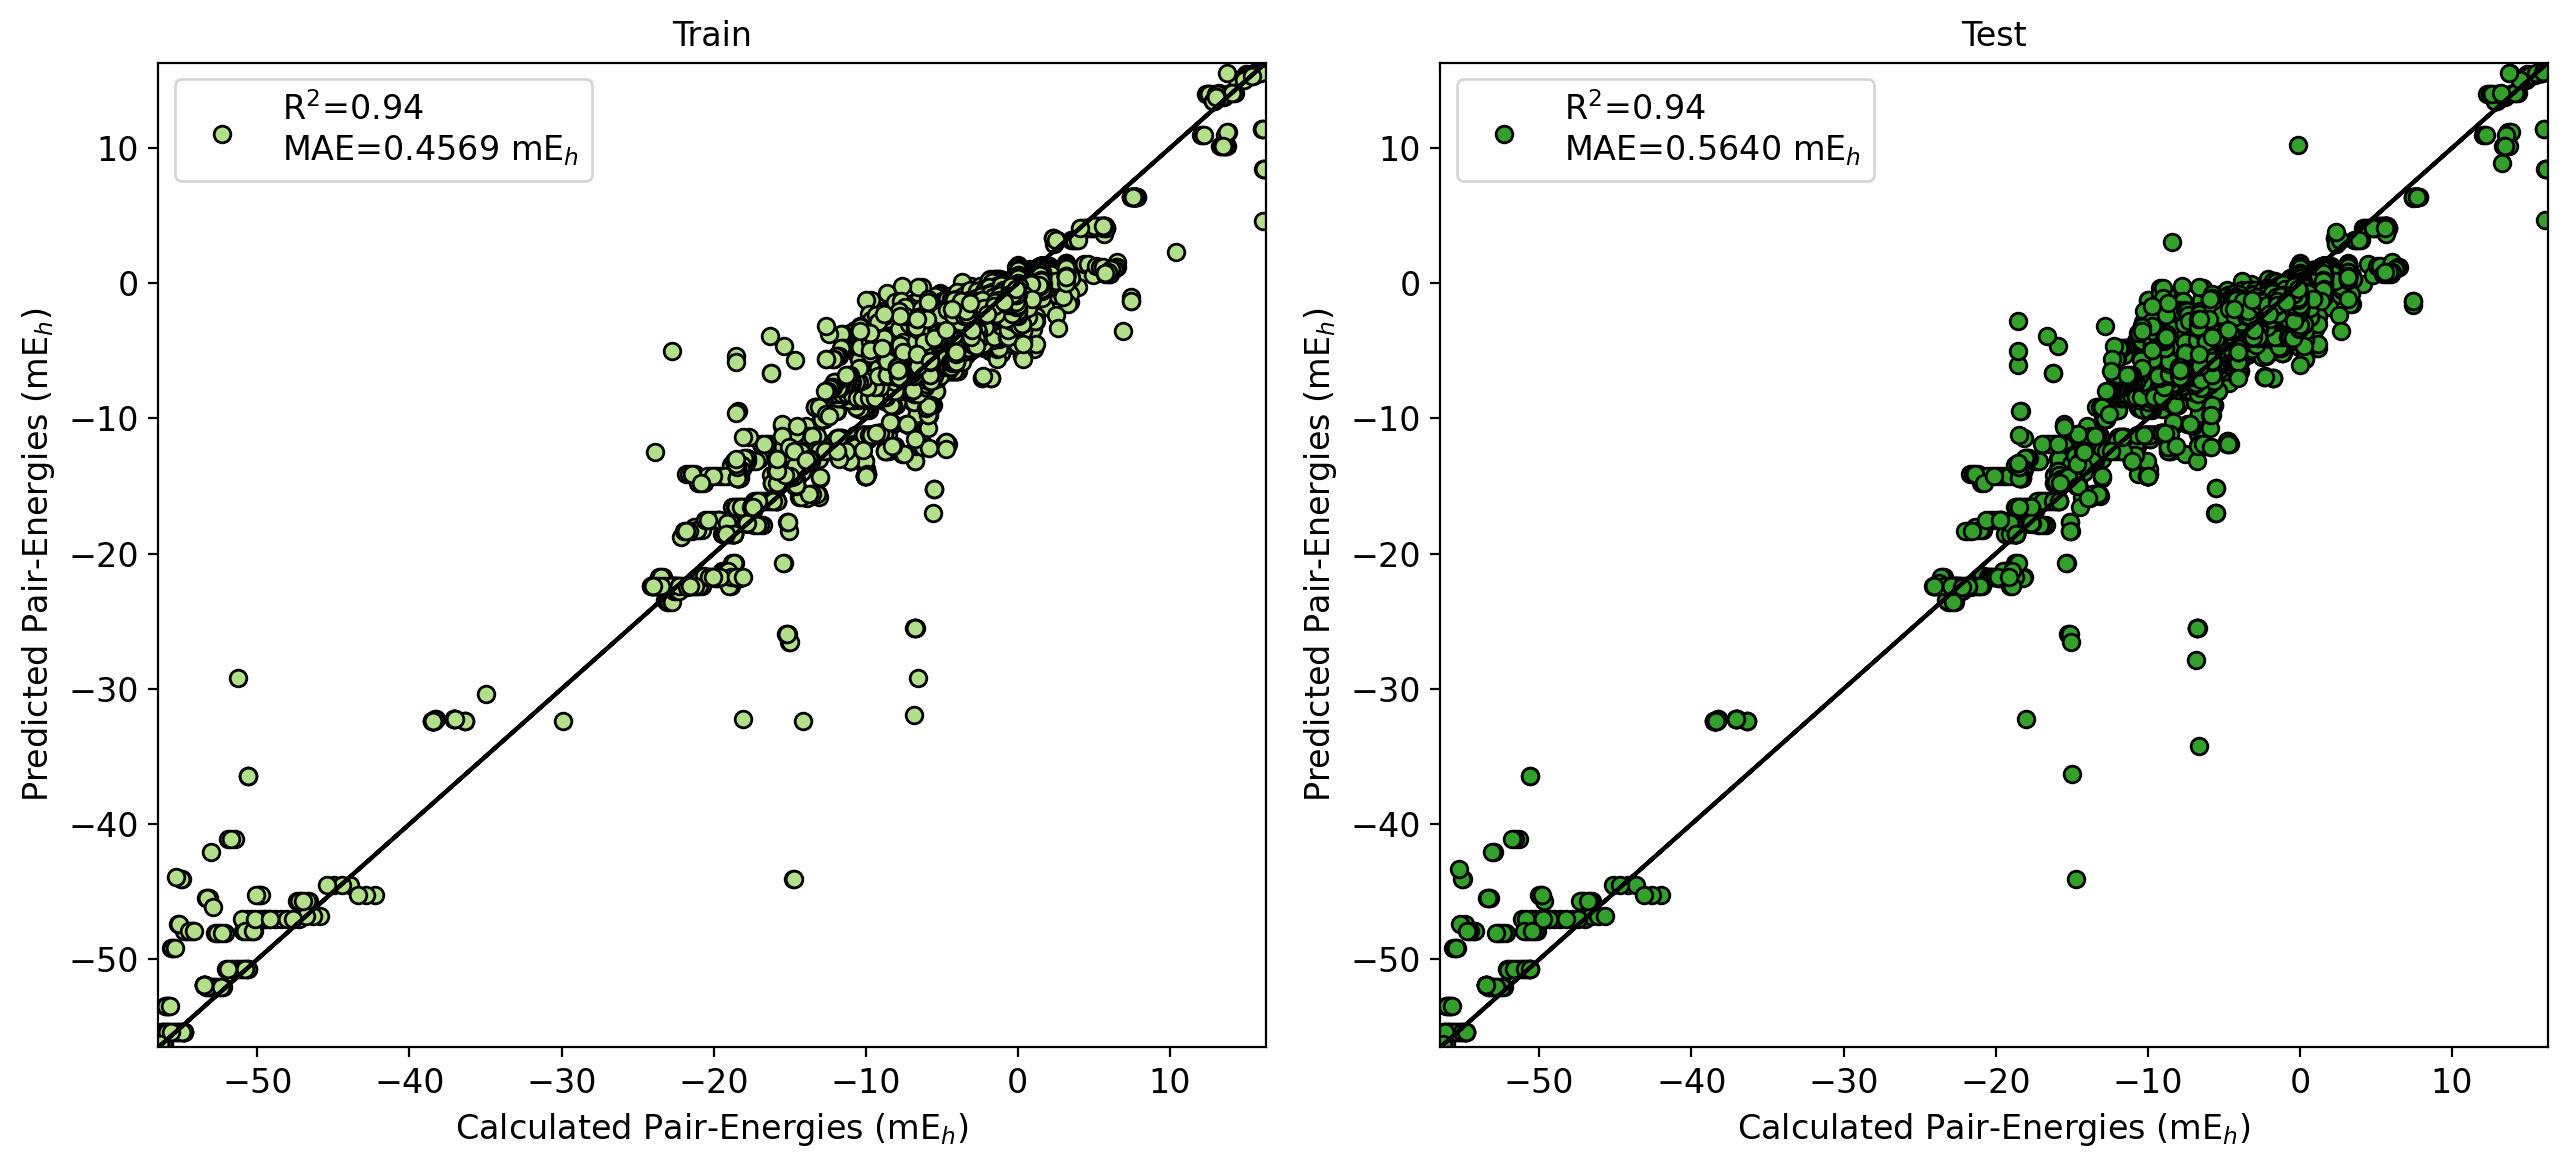

In [13]:
pal = sns.color_palette("Paired")
font=12
plt.rc('font', size=font)          # controls default text sizes
plt.rc('axes', titlesize=font)     # fontsize of the axes title
plt.rc('axes', labelsize=font)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font)    # fontsize of the tick labels
plt.rc('legend', fontsize=font)    # legend fontsize
plt.rc('figure', titlesize=font)  # fontsize of the figure title
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,6))
scale=1e-1
ax1.set_title('Train')
ax1.scatter(1e3*y_train,1e3*y_pred_train,label="R$^{2}$="+f'{r2_score(y_train,y_pred_train):.2f}\nMAE={1e3*mean_absolute_error(y_train,y_pred_train):.4f}'+" mE$_{h}$",color=pal[2],edgecolors='k')
ax1.plot(1e3*y_train,1e3*y_train,'k-')
ax1.set_xlim(1e3*min(y_train)-scale,1e3*max(y_train)+scale)
ax1.set_ylim(1e3*min(y_train)-scale,1e3*max(y_train)+scale)
ax1.set_xlabel('Calculated Pair-Energies (mE$_{h}$)')
ax1.set_ylabel('Predicted Pair-Energies (mE$_{h}$)')
ax1.legend()


ax2.set_title('Test')
ax2.scatter(1e3*y_test,1e3*y_pred_test,label="R$^{2}$="+f'{r2_score(y_test,y_pred_test):.2f}\nMAE={1e3*mean_absolute_error(y_test,y_pred_test):.4f}'+" mE$_{h}$",color=pal[3],edgecolors='k')
ax2.plot(1e3*y_test,1e3*y_test,'k-')
ax2.set_xlim(1e3*min(y_test)-scale,1e3*max(y_test)+scale)
ax2.set_ylim(1e3*min(y_test)-scale,1e3*max(y_test)+scale)
ax2.set_xlabel('Calculated Pair-Energies (mE$_{h}$)')
ax2.set_ylabel('Predicted Pair-Energies (mE$_{h}$)')
ax2.legend()

plt.tight_layout()
plt.savefig('images/ltneg4_joint_parity.png',dpi=300,bbox_inches='tight')
plt.show()

In [14]:
recoveriron_train

[('FeO', '1.00', 0, 416),
 ('FeO', '1.04', 1, 416),
 ('FeO', '1.08', 2, 416),
 ('FeO', '1.12', 3, 416),
 ('FeO', '1.16', 4, 416),
 ('FeO', '1.20', 5, 416),
 ('FeO', '1.24', 6, 416),
 ('FeO', '1.28', 7, 416),
 ('FeO', '1.32', 8, 416),
 ('FeO', '1.36', 9, 416),
 ('FeO', '1.40', 10, 416),
 ('FeO', '1.44', 11, 416),
 ('FeO', '1.48', 12, 416),
 ('FeO', '1.53', 13, 416),
 ('FeO', '1.57', 14, 416),
 ('FeO', '1.61', 15, 416),
 ('FeO', '1.65', 16, 416),
 ('FeO', '1.69', 17, 416),
 ('FeO', '1.73', 18, 416),
 ('FeO', '1.77', 19, 416),
 ('FeO', '1.81', 20, 416),
 ('FeO', '1.85', 21, 416),
 ('FeO', '1.89', 22, 416),
 ('FeO', '1.93', 23, 416),
 ('FeO', '1.97', 24, 416),
 ('FeO', '2.01', 25, 416),
 ('FeO', '2.05', 26, 416),
 ('FeO', '2.09', 27, 416),
 ('FeO', '2.13', 28, 416),
 ('FeO', '2.17', 29, 416),
 ('FeO', '2.21', 30, 416),
 ('FeO', '2.25', 31, 416),
 ('FeO', '2.29', 32, 416),
 ('FeO', '2.33', 33, 416),
 ('FeO', '2.37', 34, 416),
 ('FeO', '2.41', 35, 416),
 ('FeO', '2.45', 36, 416),
 ('FeO', '2

In [15]:
testcntrcvr = 0
recover_test_list = []
recover_test_E2 = []
for i,j,k,l in np.vstack([recover_ozone_test, recover_h2n_test,recoveriron_test]):
    init_test = testcntrcvr
    testcntrcvr+=int(l)
    if 'ozone' in i:
        recover_test_list.append(('O$_{3}$',j,y_test[init_test:testcntrcvr],y_pred_test[init_test:testcntrcvr]))
        recover_test_E2.append(('O$_{3}$',j,np.sum(y_test[init_test:testcntrcvr]),np.sum(y_pred_test[init_test:testcntrcvr])))
    elif 'FeO'==i:
        recover_test_list.append((i,j,y_test[init_test:testcntrcvr],y_pred_test[init_test:testcntrcvr]))
        recover_test_E2.append((i,j,np.sum(y_test[init_test:testcntrcvr]),np.sum(y_pred_test[init_test:testcntrcvr])))        
    else:
        recover_test_list.append((os.path.basename(i).split('_')[0].replace('H','H$_{')+"}$",j,y_test[init_test:testcntrcvr],y_pred_test[init_test:testcntrcvr]))
        recover_test_E2.append((os.path.basename(i).split('_')[0].replace('H','H$_{')+"}$",j,np.sum(y_test[init_test:testcntrcvr]),np.sum(y_pred_test[init_test:testcntrcvr])))


traincntrcvr = 0
recover_train_list = []
recover_train_E2 = []
for i,j,k,l in np.vstack([recover_ozone_train, recover_h2n_train,recoveriron_train]):
    init_train = traincntrcvr
    traincntrcvr+=int(l)
    if 'ozone' in i:
        recover_train_list.append(('O$_{3}$',j,y_train[init_train:traincntrcvr],y_pred_train[init_train:traincntrcvr]))
        recover_train_E2.append(('O$_{3}$',j,np.sum(y_train[init_train:traincntrcvr]),np.sum(y_pred_train[init_train:traincntrcvr])))
    elif 'FeO'==i:        
        recover_train_list.append((i,j,y_train[init_train:traincntrcvr],y_pred_train[init_train:traincntrcvr]))
        recover_train_E2.append((i,j,np.sum(y_train[init_train:traincntrcvr]),np.sum(y_pred_train[init_train:traincntrcvr])))        
    else:
        recover_train_list.append((os.path.basename(i).split('_')[0].replace('H','H$_{')+"}$",j,y_train[init_train:traincntrcvr],y_pred_train[init_train:traincntrcvr]))
        recover_train_E2.append((os.path.basename(i).split('_')[0].replace('H','H$_{')+"}$",j,np.sum(y_train[init_train:traincntrcvr]),np.sum(y_pred_train[init_train:traincntrcvr])))        

In [16]:
traincorrE2 = pd.DataFrame(recover_train_E2).rename(columns={0:'system',1:'Radius ($\AA$)',2:'E$_{2}^{\text{Calculated}}$',3:'E$_{2}^{\text{Predicted}}$'})
#.astype({'system':str,'Radius ($\AA$)':float,'E$_{2}^{\text{Calculated}}$':float,'E$_{2}^{\text{Predicted}}$':float})
testcorrE2 = pd.DataFrame(recover_test_E2).rename(columns={0:'system',1:'Radius ($\AA$)',2:'E$_{2}^{\text{Calculated}}$',3:'E$_{2}^{\text{Predicted}}$'})
#.astype({'system':str,'Radius ($\AA$)':float,'E$_{2}^{\text{Calculated}}$':float,'E$_{2}^{\text{Predicted}}$':float})


traincorrE2['CASPT2_E']=np.zeros(len(traincorrE2))
traincorrE2['CASSCF_E']=np.zeros(len(traincorrE2))
traincorrE2['E2']=np.zeros(len(traincorrE2))

traincorrE2.index = ["_".join((u,v)) for u,v in traincorrE2[['system','Radius ($\AA$)']].values]

for i in traincorrE2.index:
    if 'O$_{3}$' in i:
        energy_df = pd.read_excel(f"../ozone/ANO-RCC-VDZP/ozone_{i.split('_')[-1]}/ozone_{i.split('_')[-1]}_energies.xlsx",index_col=0)
        traincorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
        traincorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values
    elif 'H' in i:
        hn, r =i.split('_')[1].replace('}$','').replace('{',''),i.split('_')[-1]
        energy_df = pd.read_excel(f"../hydrogen_comps/H{hn}_chain/H{hn}_{r}/H{hn}_{r}_energies.xlsx",index_col=0)
        traincorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
        traincorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values   
    elif 'FeO' in i:
        energy_df = pd.read_excel(f"../iron_oxo_DDCASPT2/cluster/{i.split('_')[-1]}/{i.split('_')[-1]}_energies.xlsx",index_col=0)
        traincorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
        traincorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values        
    # traincorrE2.loc[i,'E2']=energy_df.loc['E2'].values

traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'] = traincorrE2['CASSCF_E']+traincorrE2['E$_{2}^{\text{Predicted}}$']

traincorrE2.rename(columns = {'CASPT2_E':'E$_{\text{CASPT2}}^{\text{Calculated}}$','CASSCF_E':'E$_{\text{CASSCF}}^{\text{Calculated}}$'},inplace=True)


testcorrE2['CASPT2_E']=np.zeros(len(testcorrE2))
testcorrE2['CASSCF_E']=np.zeros(len(testcorrE2))
testcorrE2['E2']=np.zeros(len(testcorrE2))

testcorrE2.index = ["_".join((u,v)) for u,v in testcorrE2[['system','Radius ($\AA$)']].values]

for i in testcorrE2.index:
    if 'O$_{3}$' in i:
        energy_df = pd.read_excel(f"../ozone/ANO-RCC-VDZP/ozone_{i.split('_')[-1]}/ozone_{i.split('_')[-1]}_energies.xlsx",index_col=0)
        testcorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
        testcorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values
    elif 'H' in i:
        hn, r =i.split('_')[1].replace('}$','').replace('{',''),i.split('_')[-1]
        energy_df = pd.read_excel(f"../hydrogen_comps/H{hn}_chain/H{hn}_{r}/H{hn}_{r}_energies.xlsx",index_col=0)
        testcorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
        testcorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values
    elif 'FeO' in i:
        energy_df = pd.read_excel(f"../iron_oxo_DDCASPT2/cluster/{i.split('_')[-1]}/{i.split('_')[-1]}_energies.xlsx",index_col=0)
        testcorrE2.loc[i,'CASPT2_E']=energy_df.loc['CASPT2_E'].values
        testcorrE2.loc[i,'CASSCF_E']=energy_df.loc['CASSCF_E'].values          
    # testcorrE2.loc[i,'E2']=energy_df.loc['E2'].values

testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'] = testcorrE2['CASSCF_E']+testcorrE2['E$_{2}^{\text{Predicted}}$']

testcorrE2.rename(columns = {'CASPT2_E':'E$_{\text{CASPT2}}^{\text{Calculated}}$','CASSCF_E':'E$_{\text{CASSCF}}^{\text{Calculated}}$'},inplace=True)

In [17]:
traincaspt2melt = traincorrE2.melt(id_vars=['system','Radius ($\AA$)'], value_vars=['E$_{\text{CASPT2}}^{\text{Calculated}}$','E$_{\text{CASPT2}}^{\text{Predicted}}$']).astype({'Radius ($\AA$)':float,'value':float})
testcaspt2melt = testcorrE2.melt(id_vars=['system','Radius ($\AA$)'], value_vars=['E$_{\text{CASPT2}}^{\text{Calculated}}$','E$_{\text{CASPT2}}^{\text{Predicted}}$']).astype({'Radius ($\AA$)':float,'value':float})

In [18]:
trueE2=pd.concat([traincorrE2,testcorrE2]).astype({'Radius ($\AA$)':float,'E$_{\text{CASPT2}}^{\text{Calculated}}$':float})

In [19]:
mean_absolute_error(testcorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3

np.float64(5.486874374167825)

In [20]:
mean_absolute_error(traincorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3

np.float64(3.8337656957698107)

In [21]:
pairedcp=sns.color_palette('Paired')

In [22]:
try:
    os.mkdir('images')
except:
    print("./images exists")

./images exists


In [23]:
r2_score(traincorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])

0.9999999997480356

In [24]:
r2_score(testcorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])

0.9999999997148723

In [25]:
mean_absolute_error(traincorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],traincorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3

np.float64(3.8337656957698107)

In [26]:
mean_absolute_error(testcorrE2['E$_{\text{CASPT2}}^{\text{Calculated}}$'],testcorrE2['E$_{\text{CASPT2}}^{\text{Predicted}}$'])*1e3

np.float64(5.486874374167825)

In [27]:
traincaspt2melt['system']

0       O$_{3}$
1       O$_{3}$
2       O$_{3}$
3       O$_{3}$
4       O$_{3}$
         ...   
1087        FeO
1088        FeO
1089        FeO
1090        FeO
1091        FeO
Name: system, Length: 1092, dtype: object

-1345.98756136 -1344.84142778
FeO


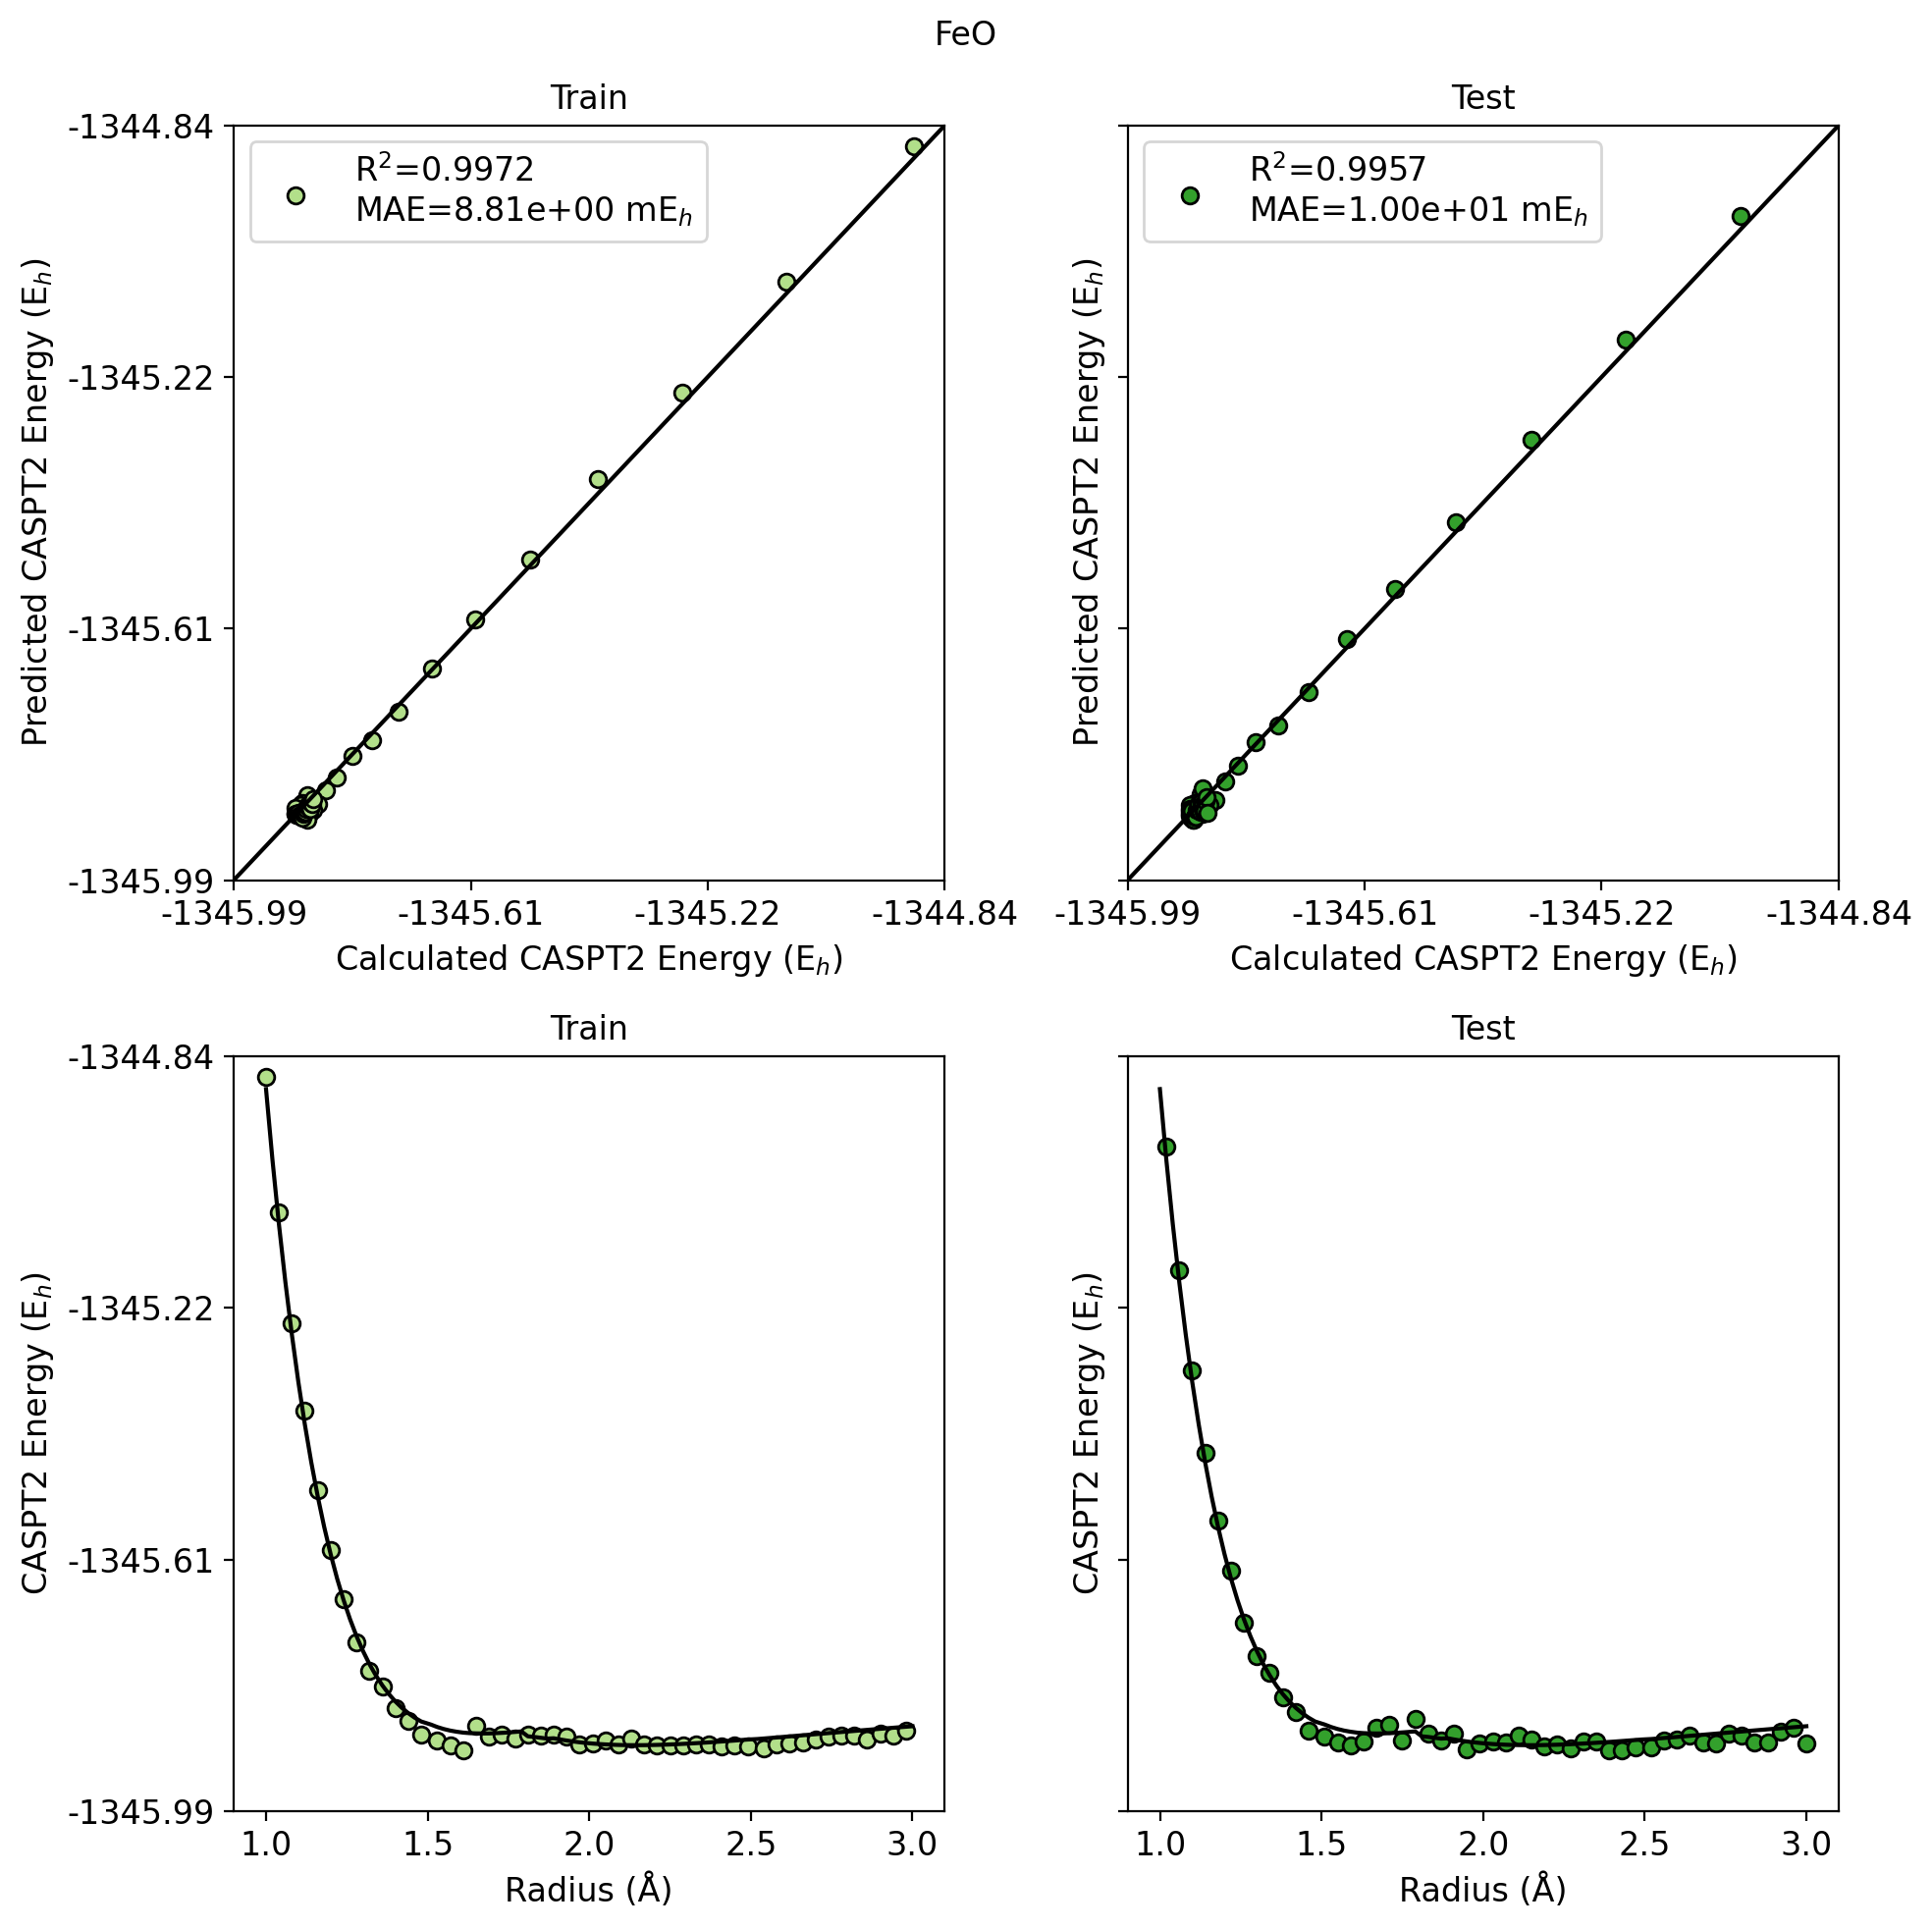

-5.6535271867 -4.7384318718000005
H$_{10}$


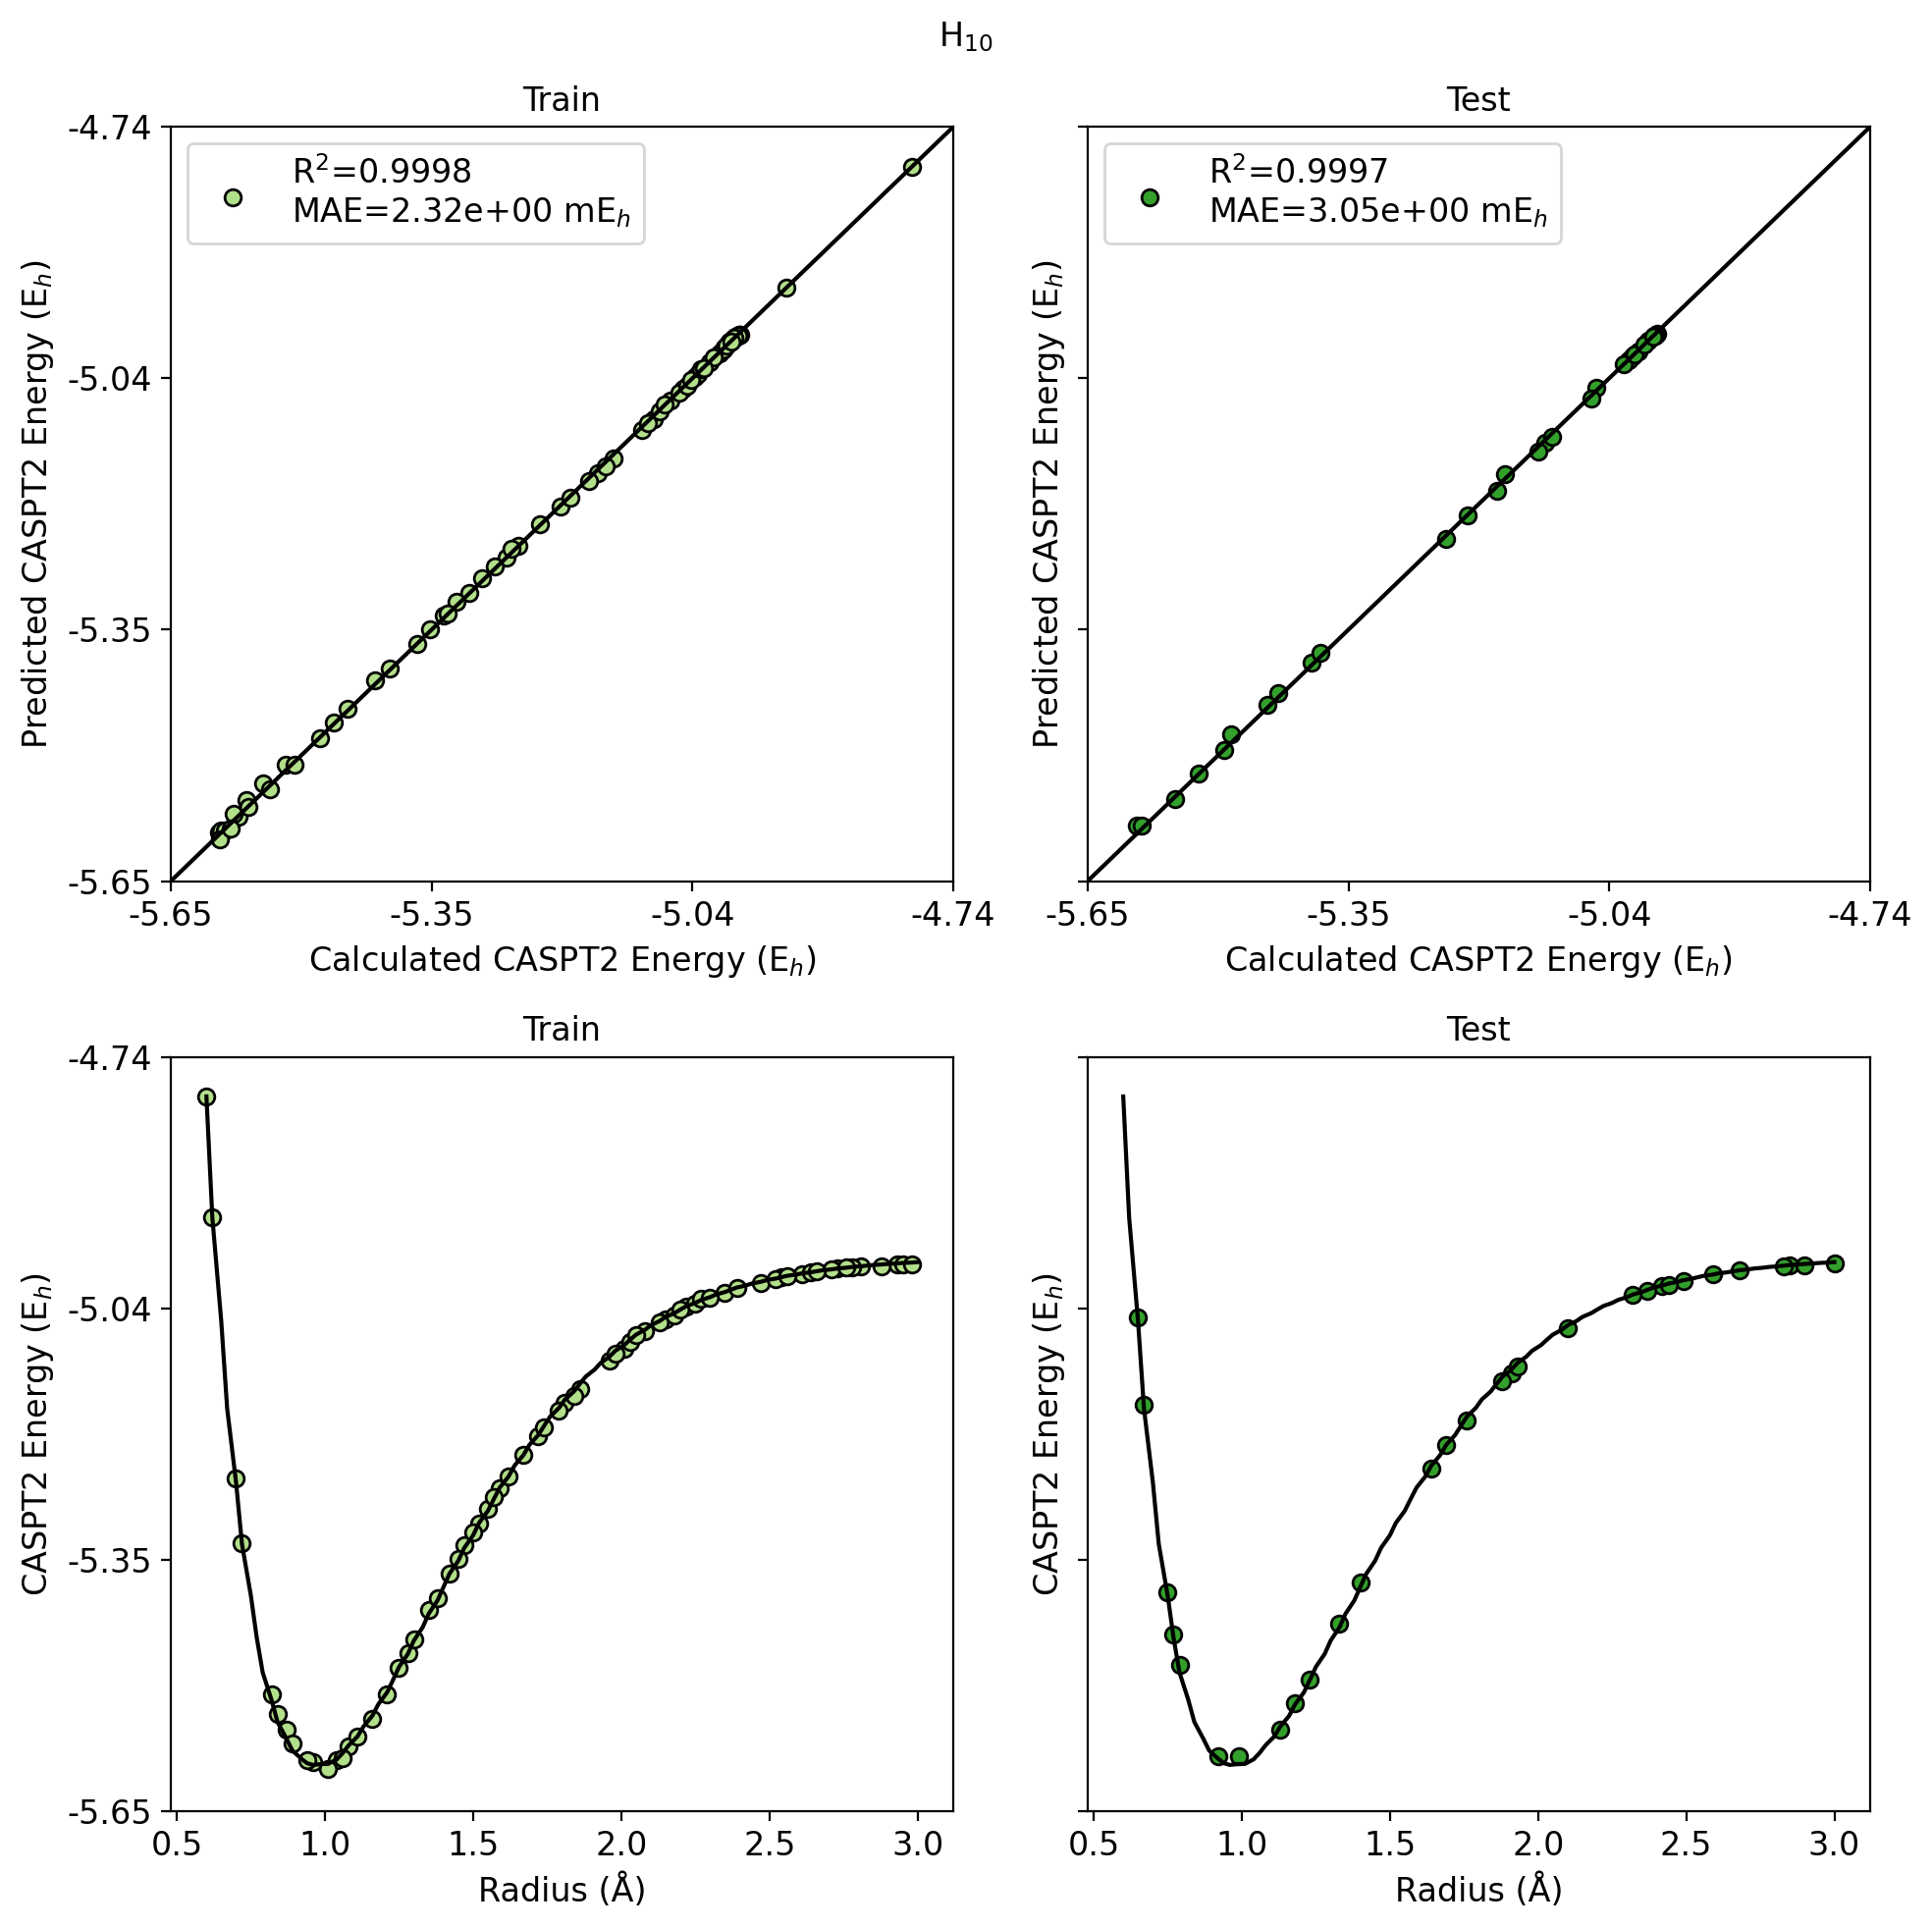

-6.7845156624 -5.6401166052
H$_{12}$


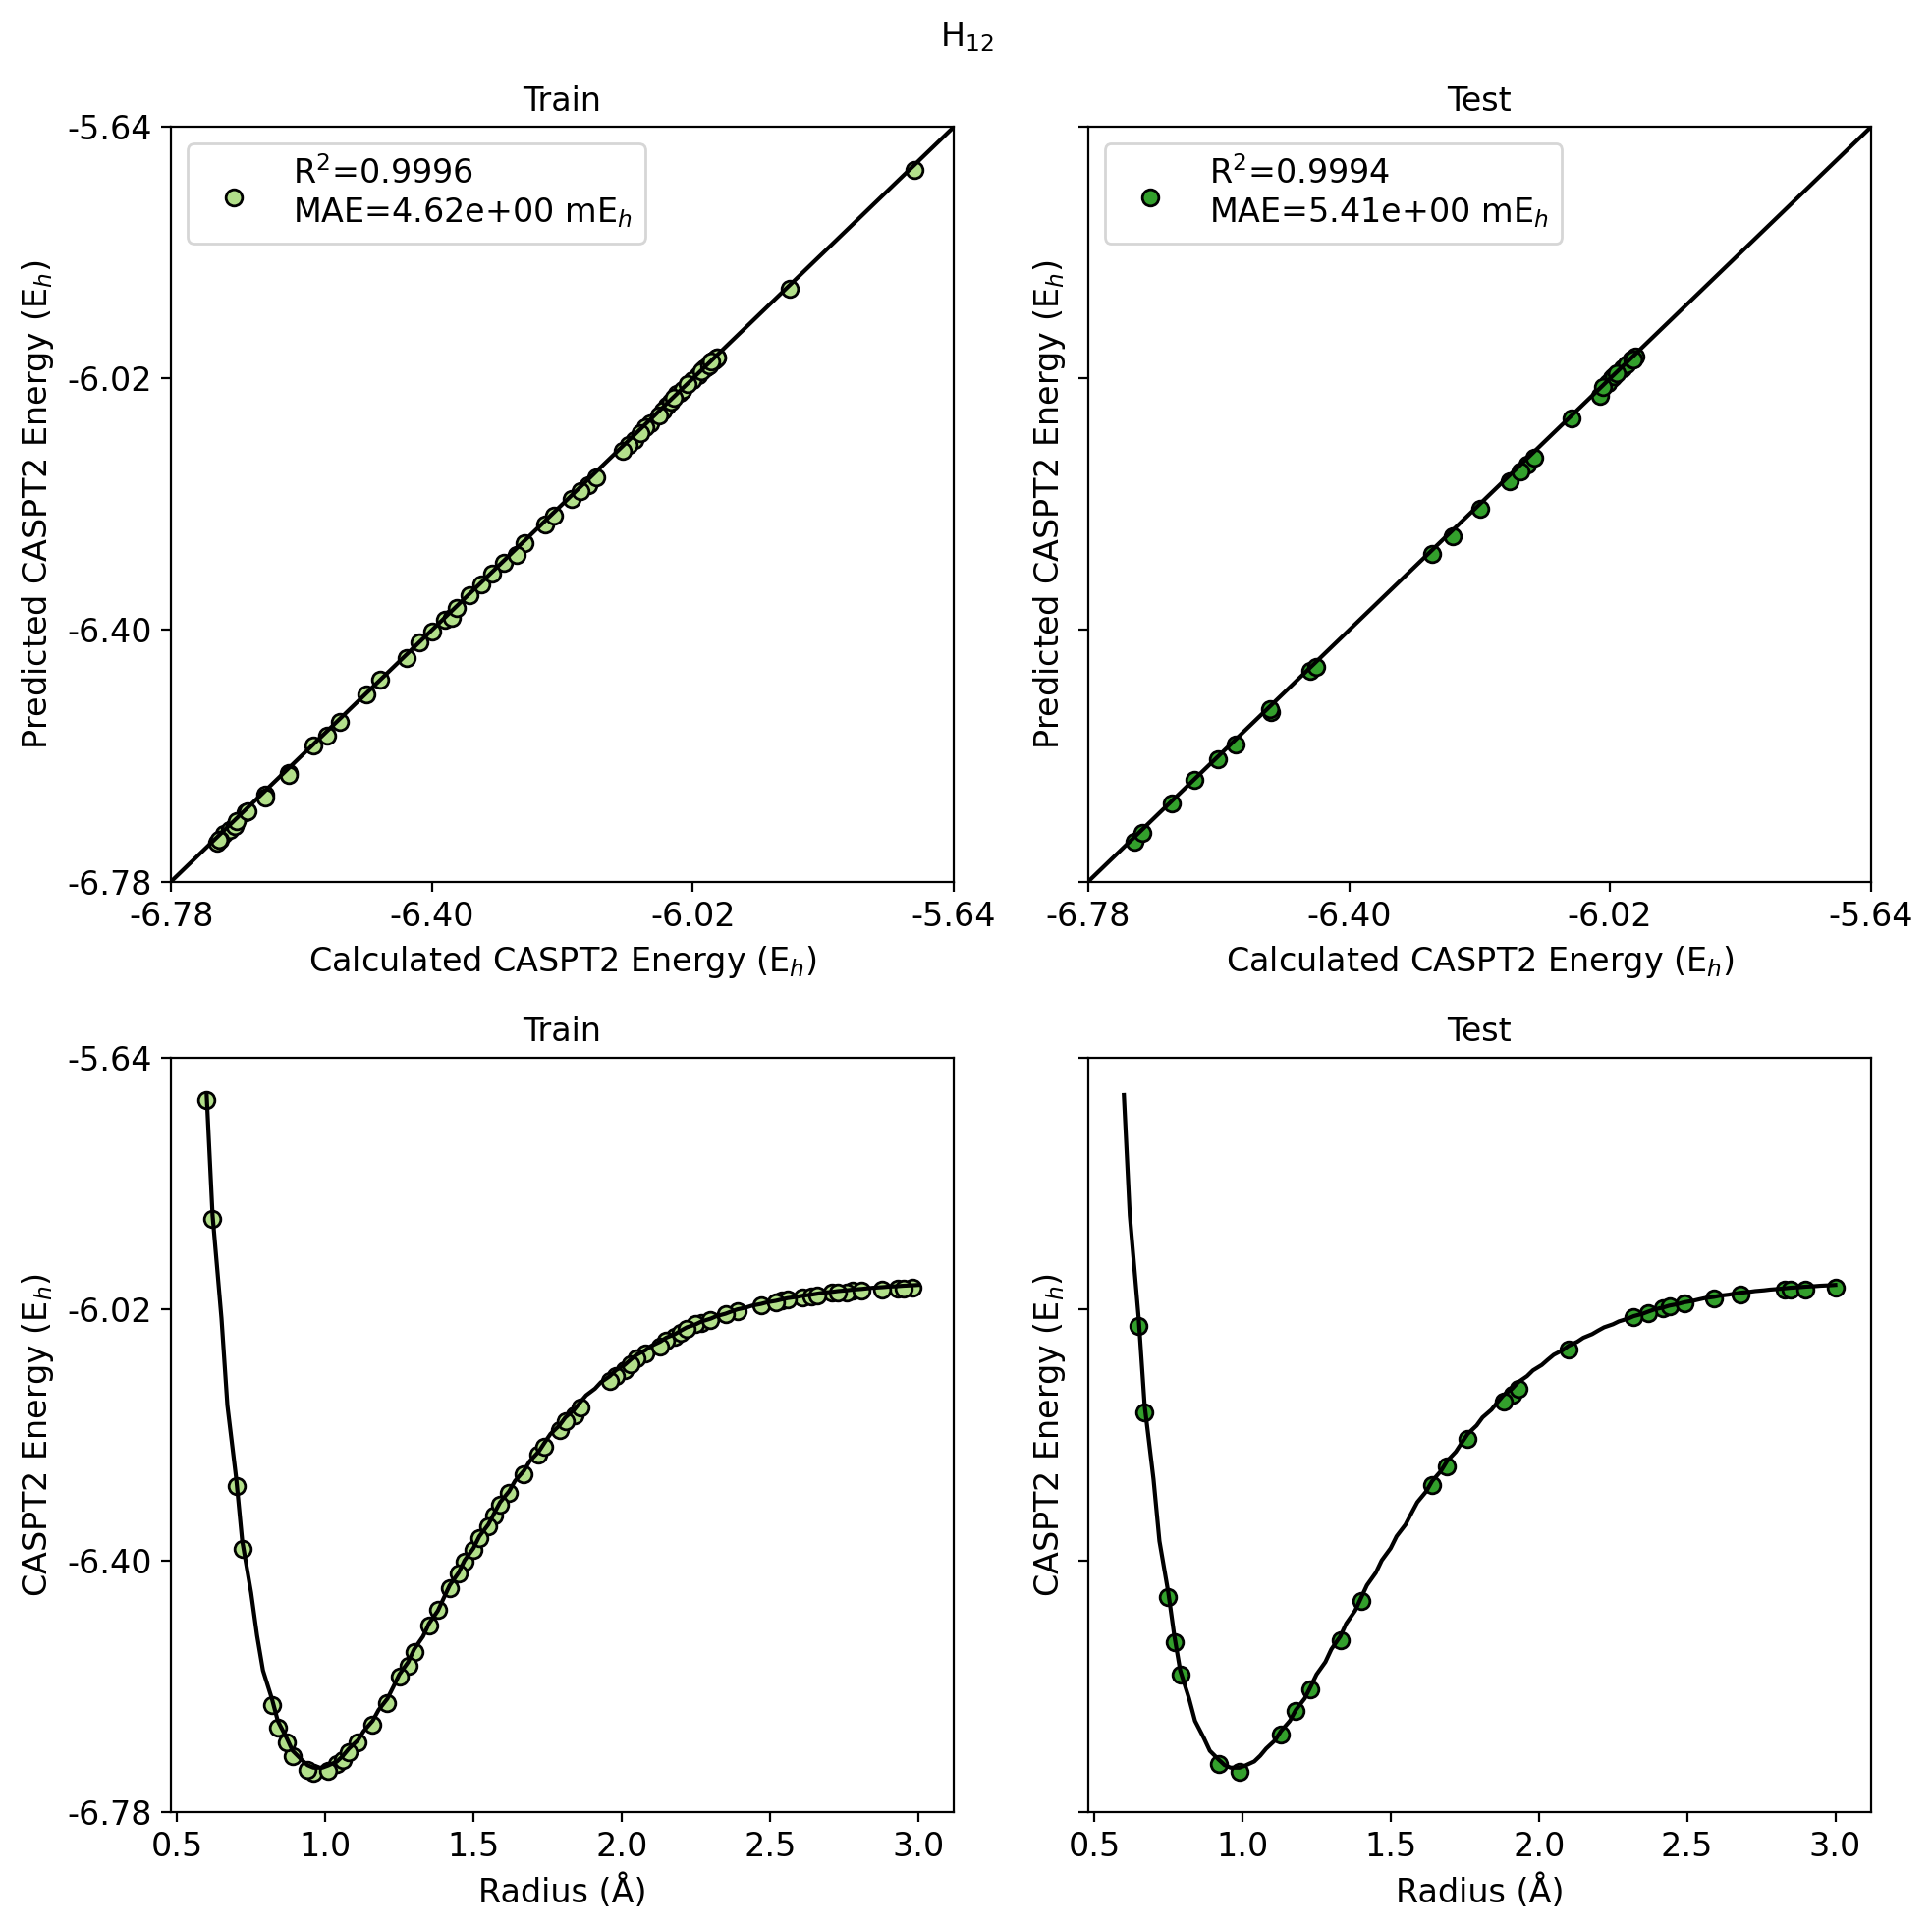

-1.173253774 -0.9868919148
H$_{2}$


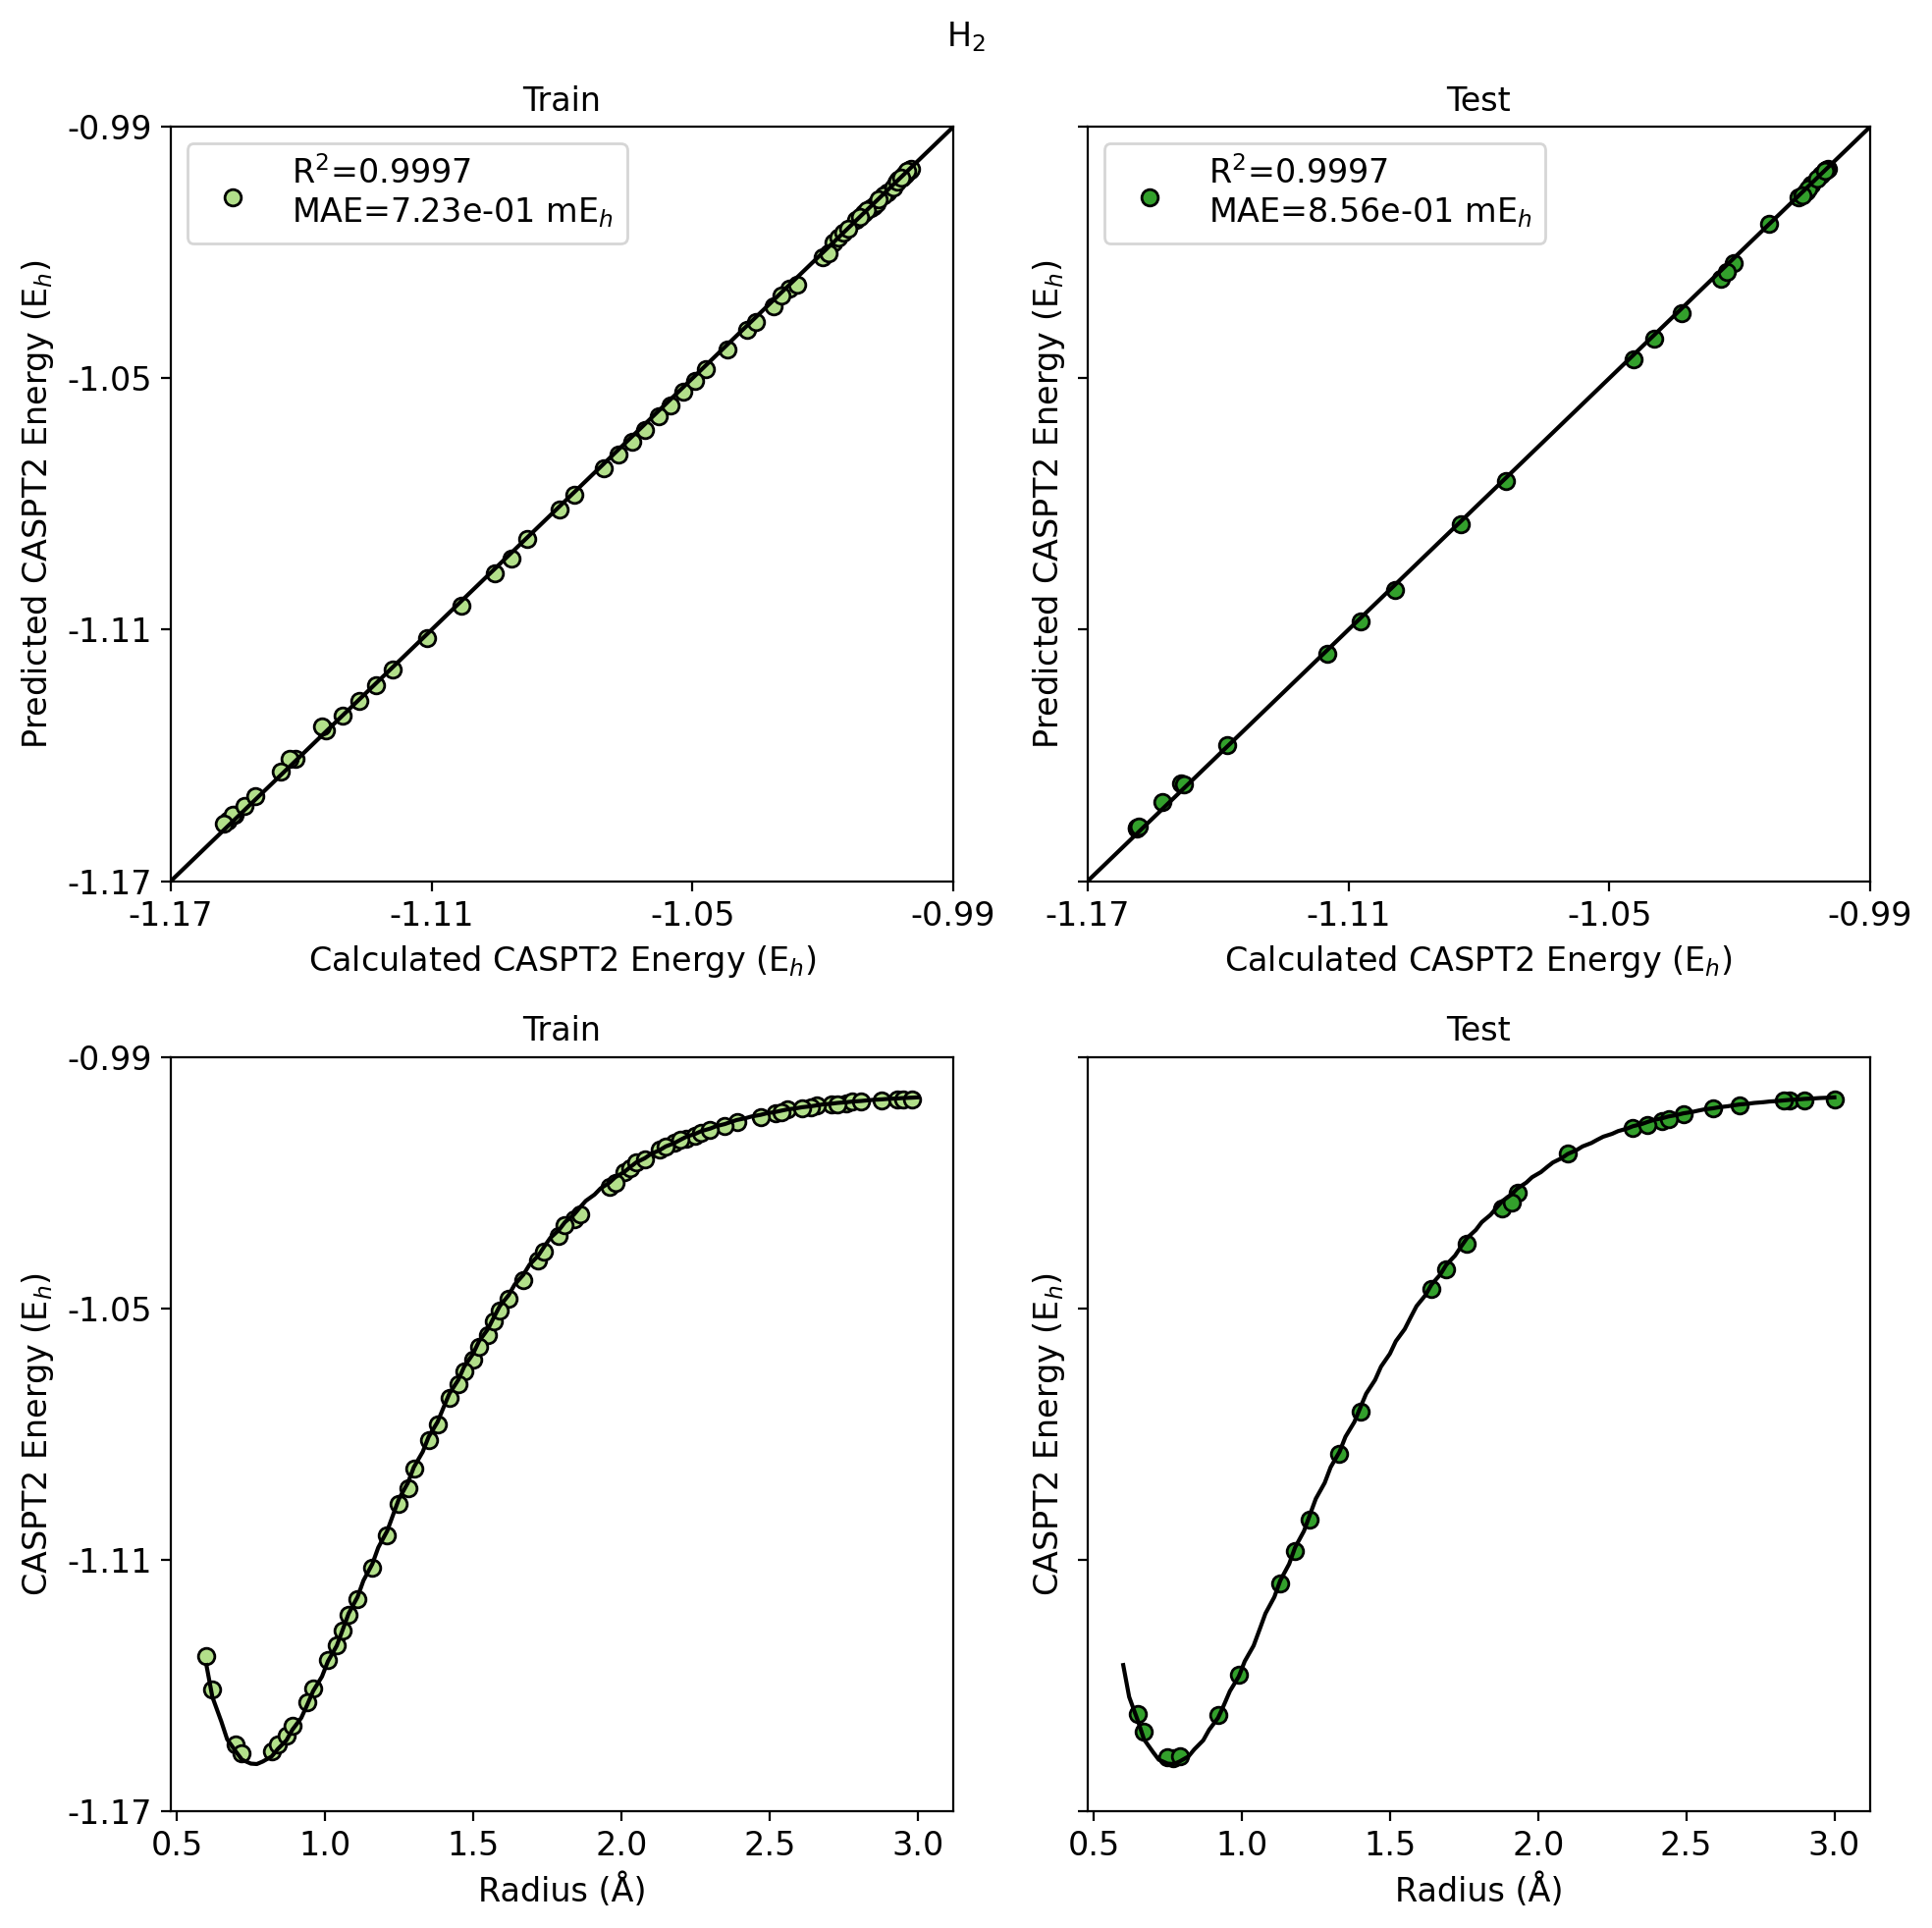

-2.2794271254000003 -1.974513618
H$_{4}$


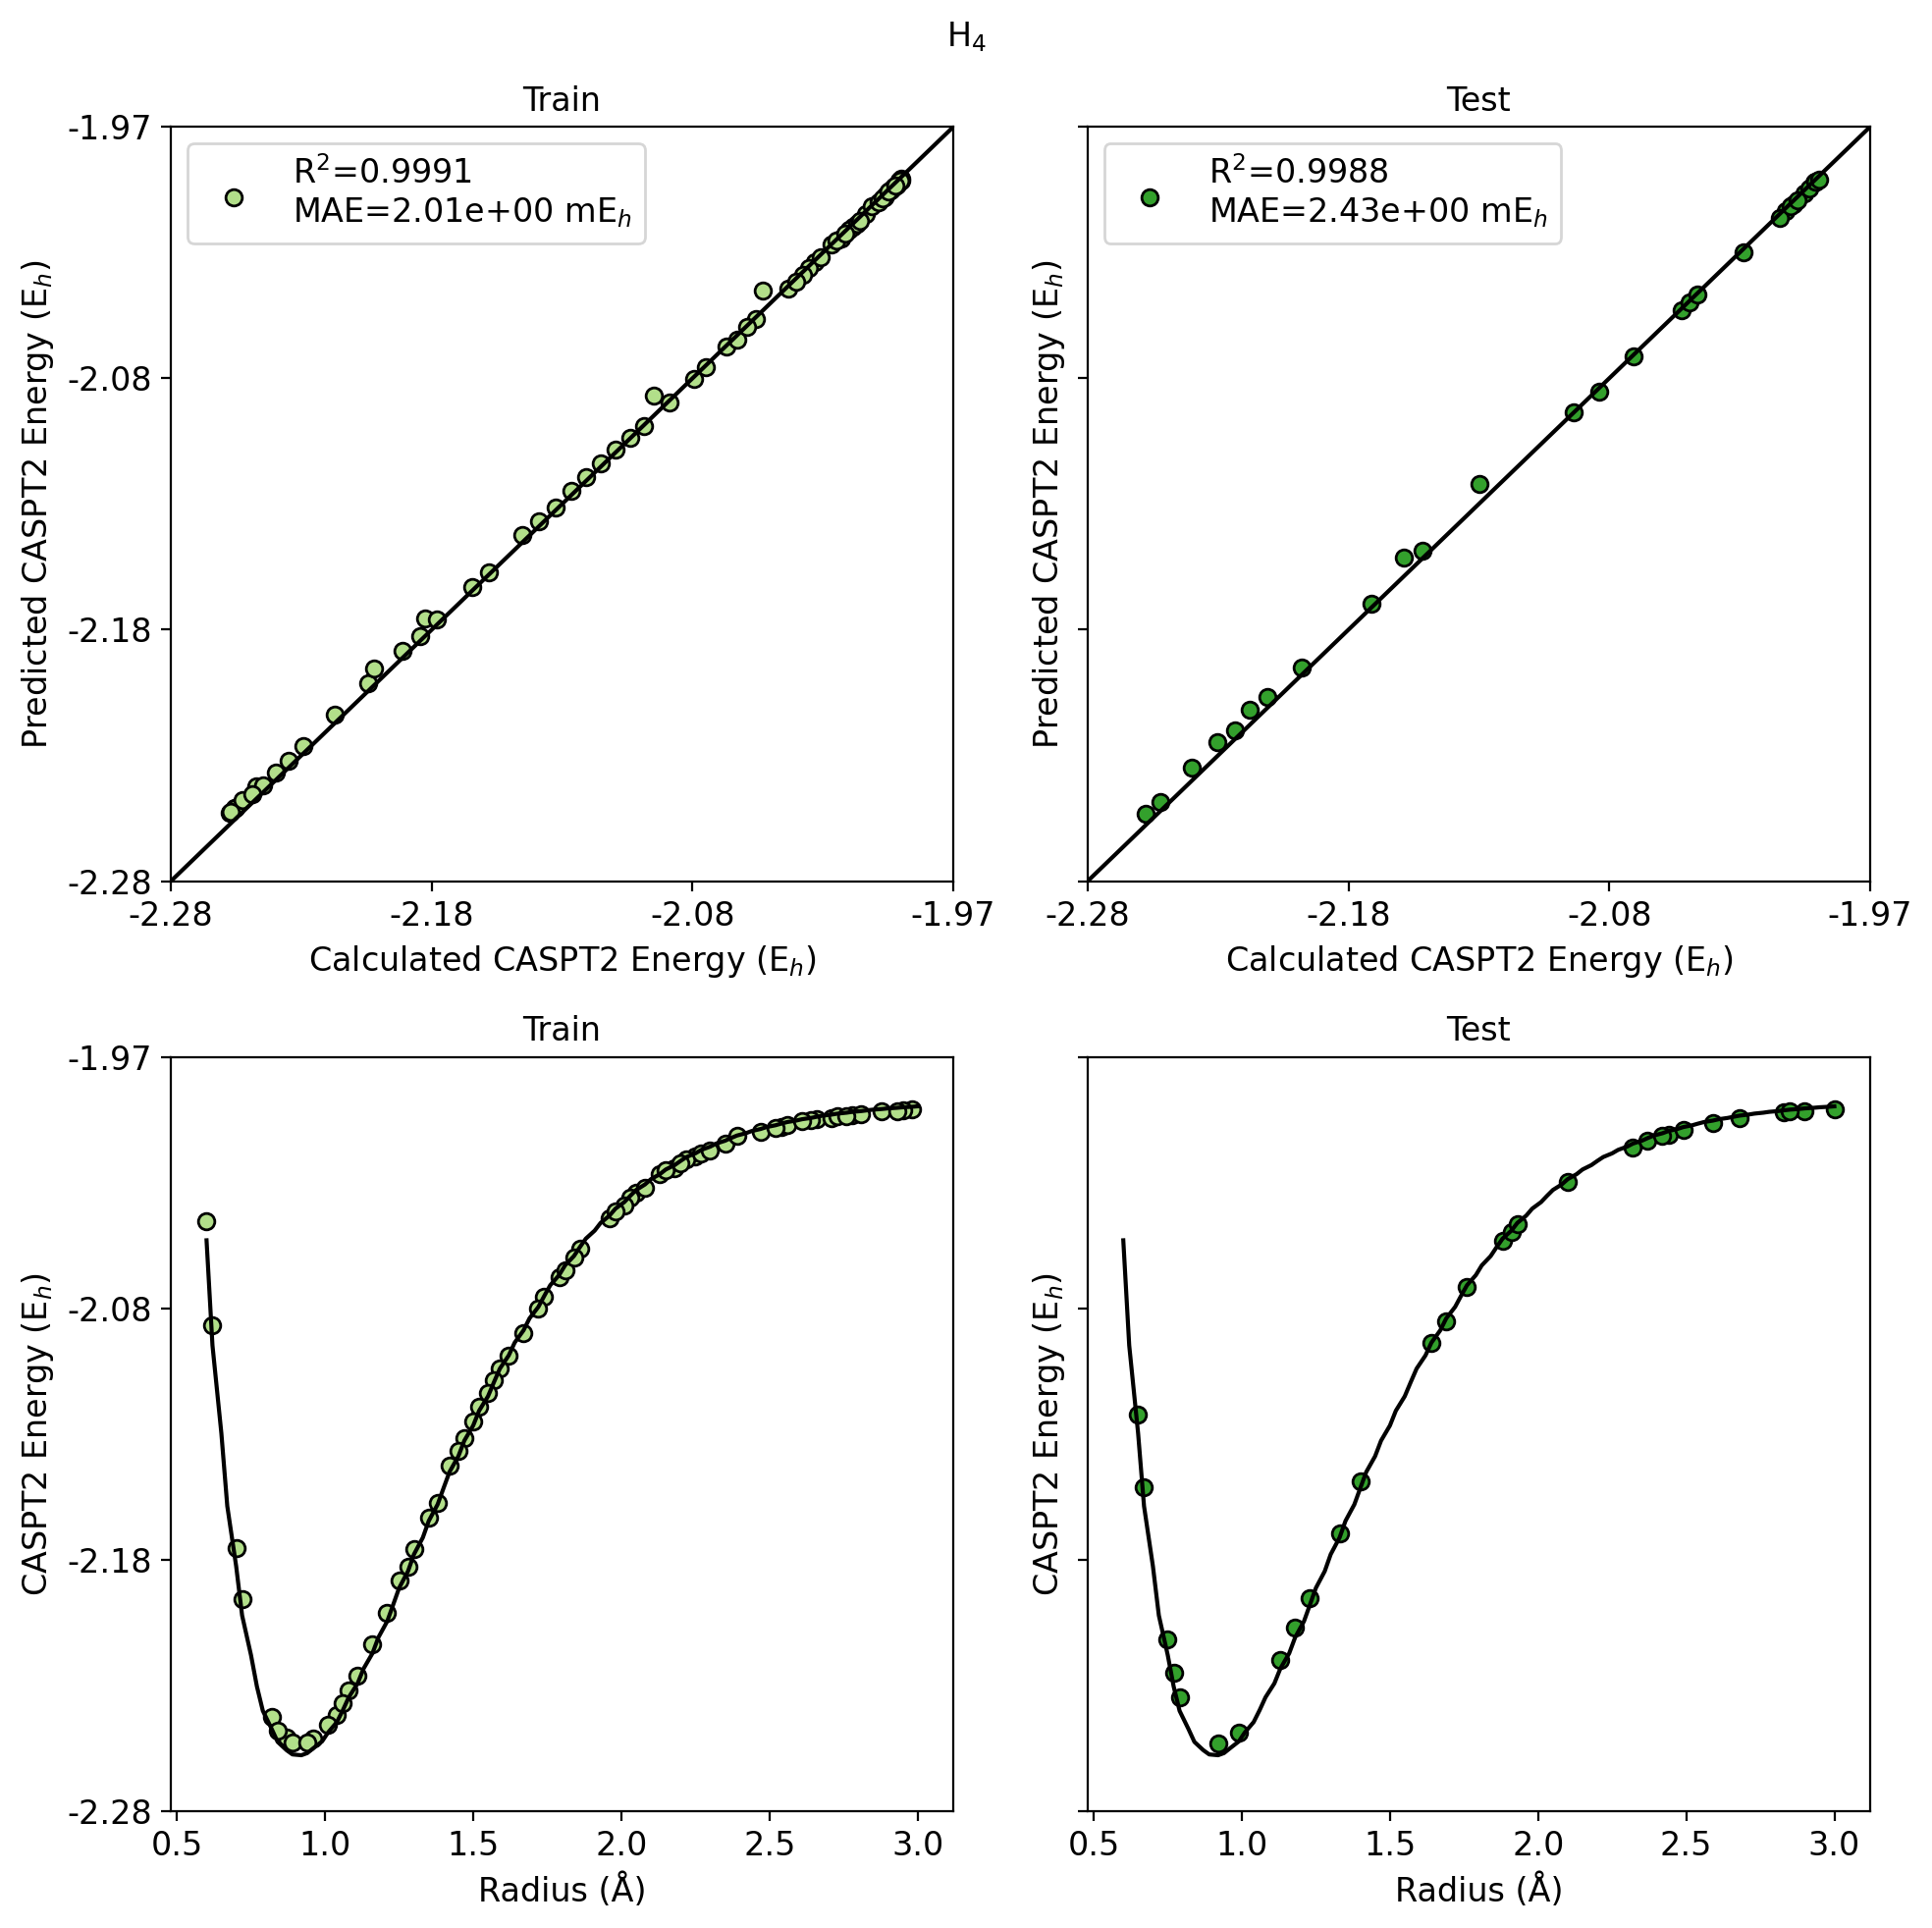

-3.4024632247 -2.931632748
H$_{6}$


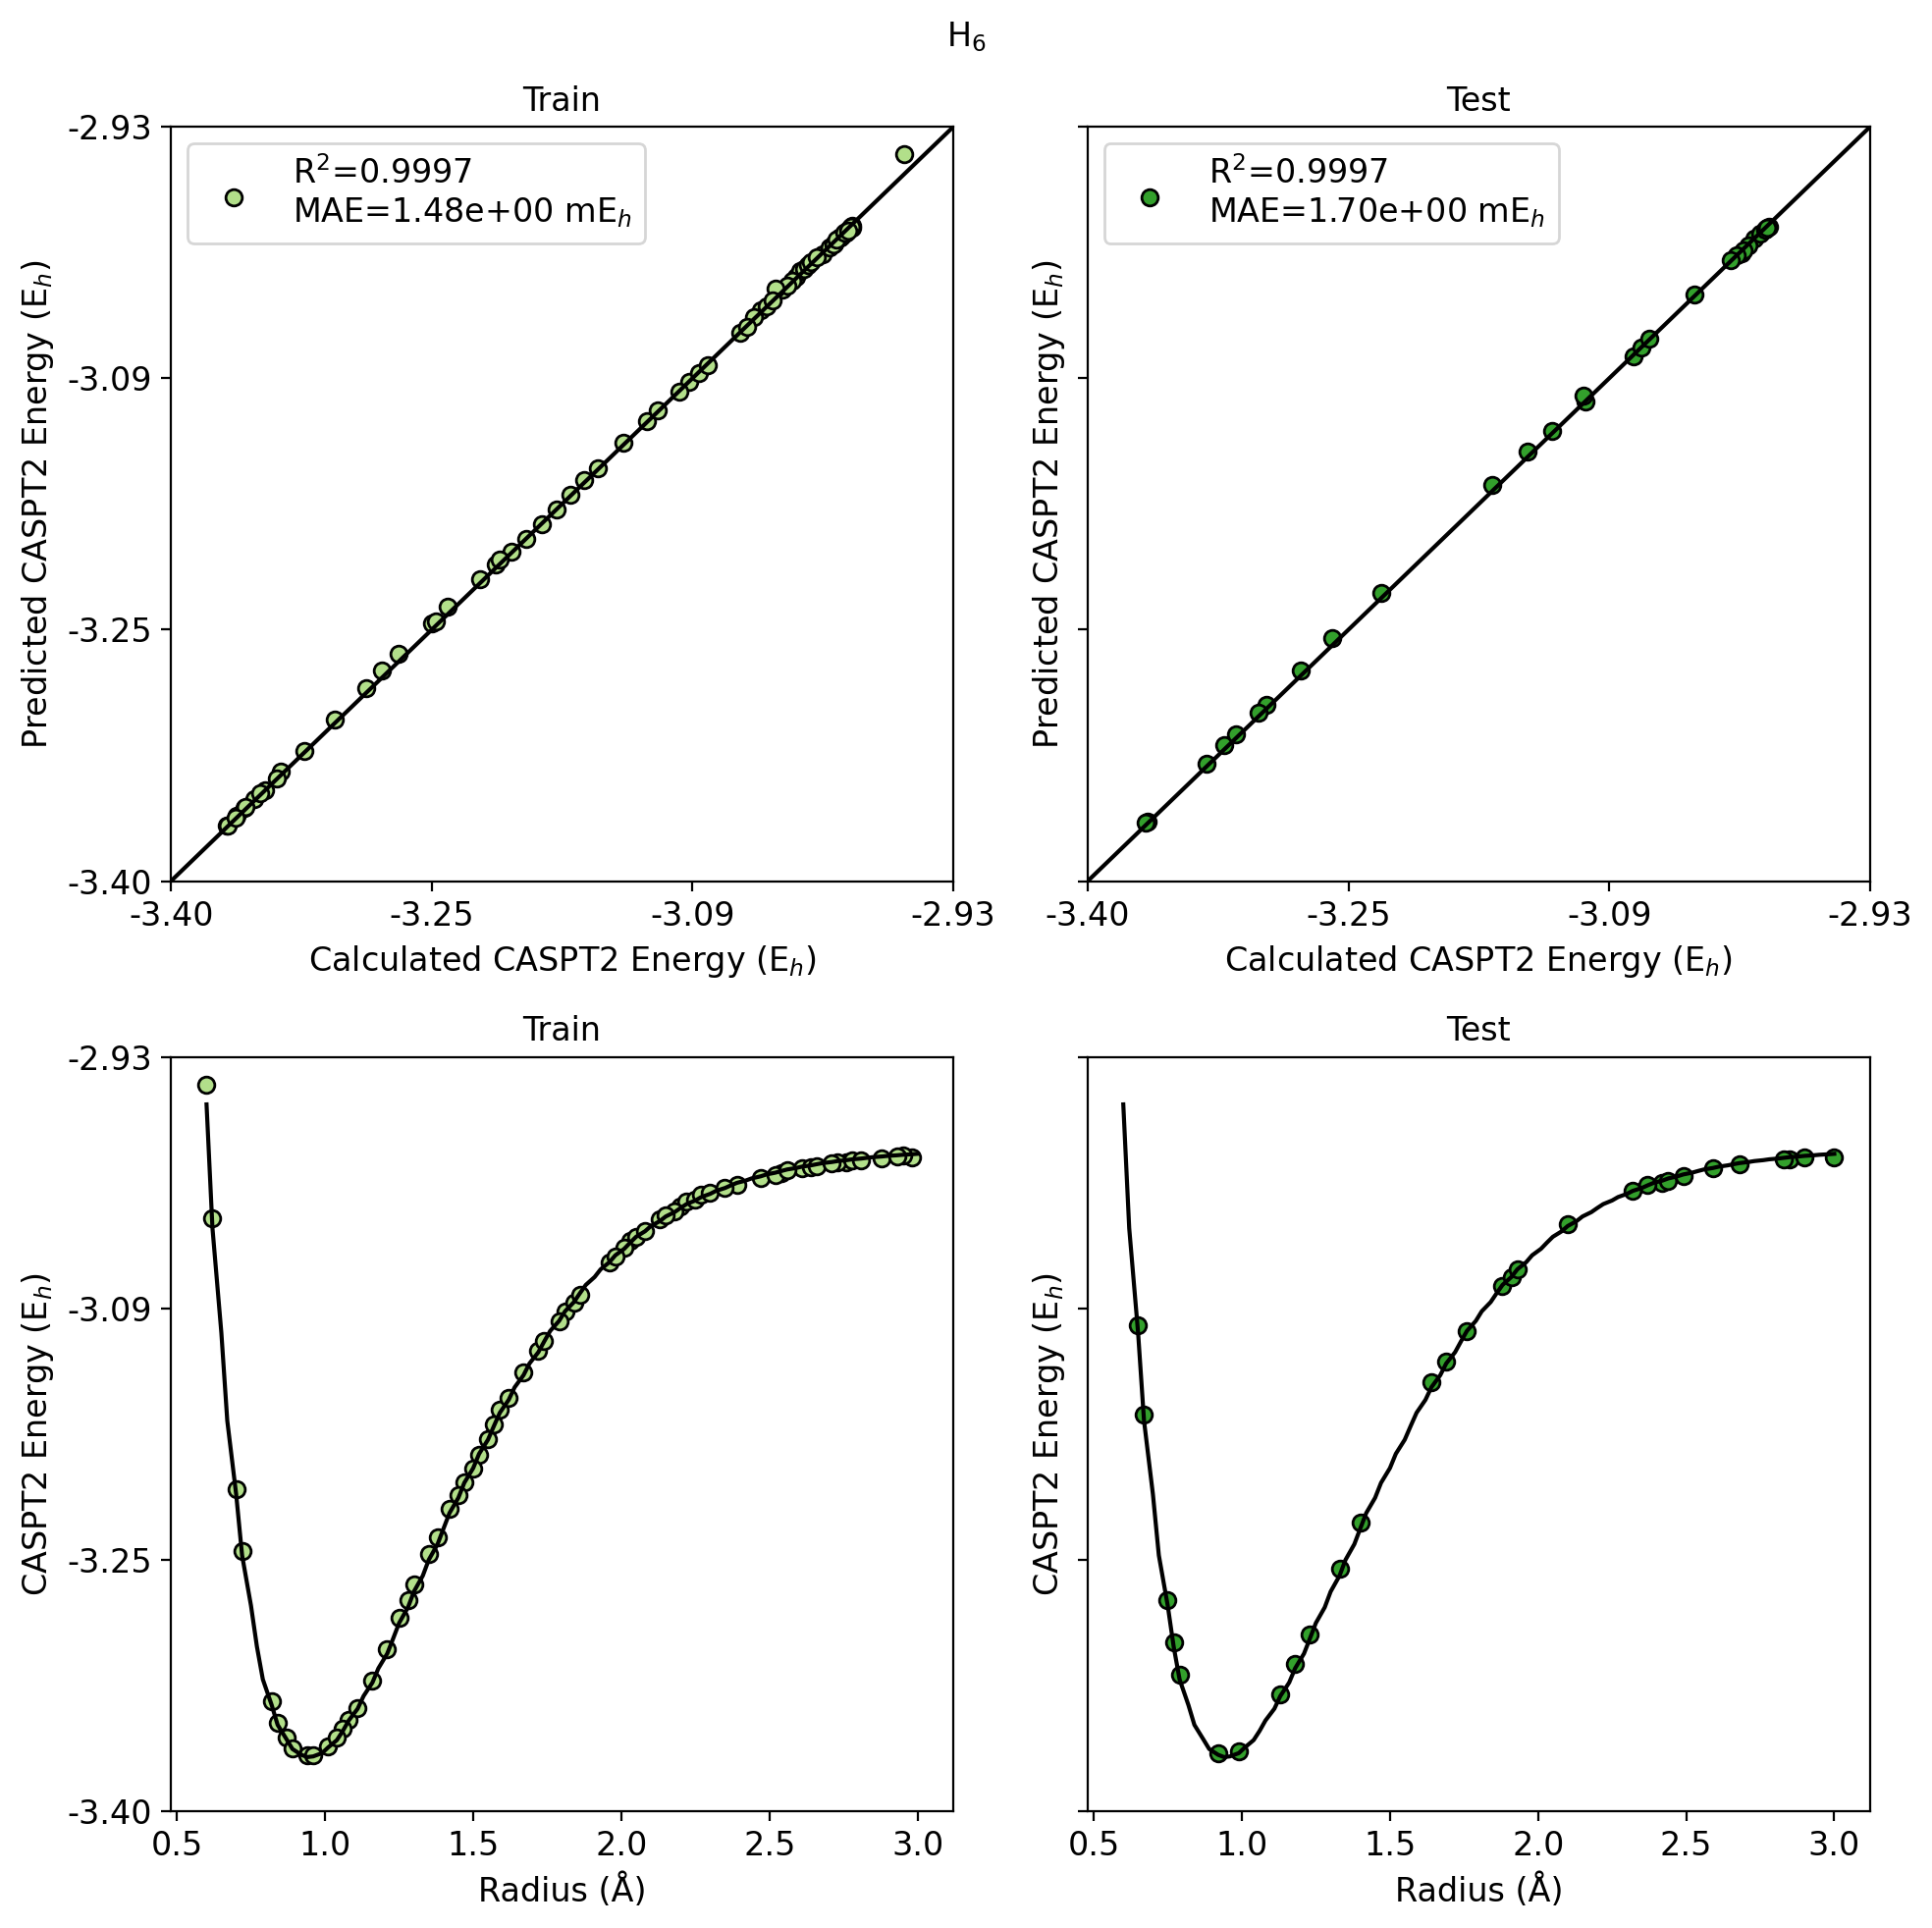

-4.5288285567 -3.8351789289
H$_{8}$


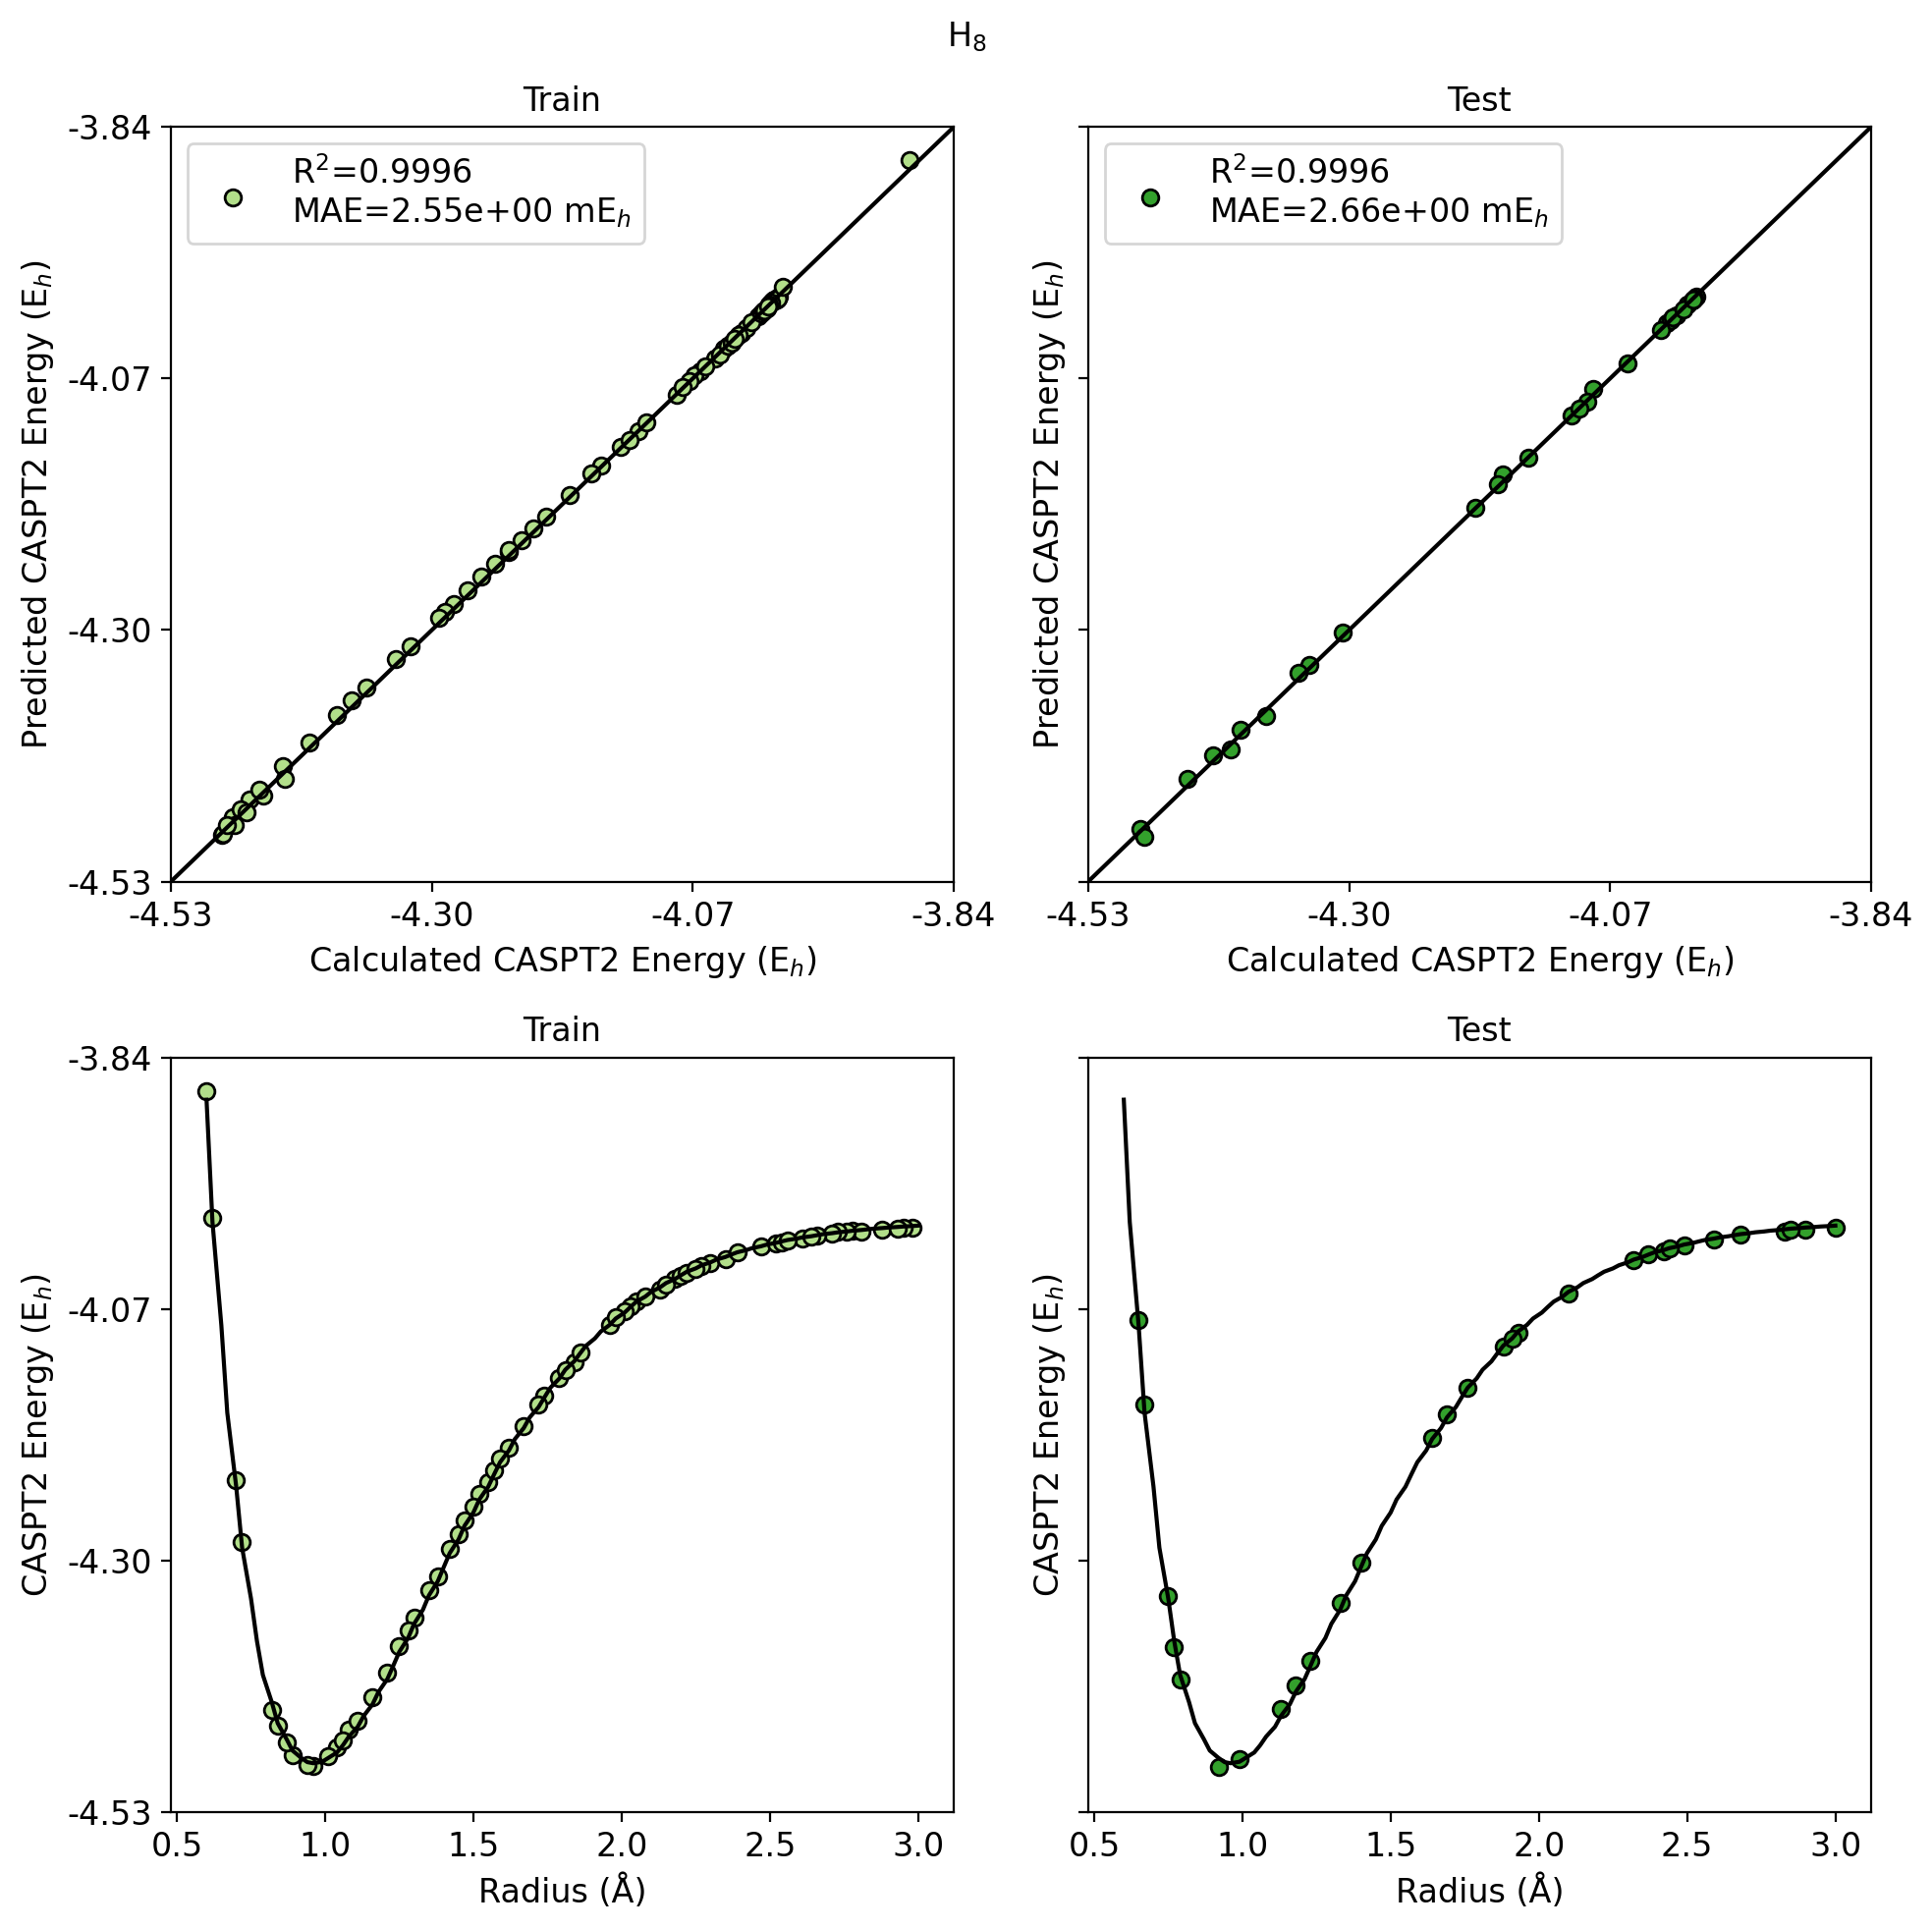

-225.22296307 -224.92808466999998
O$_{3}$


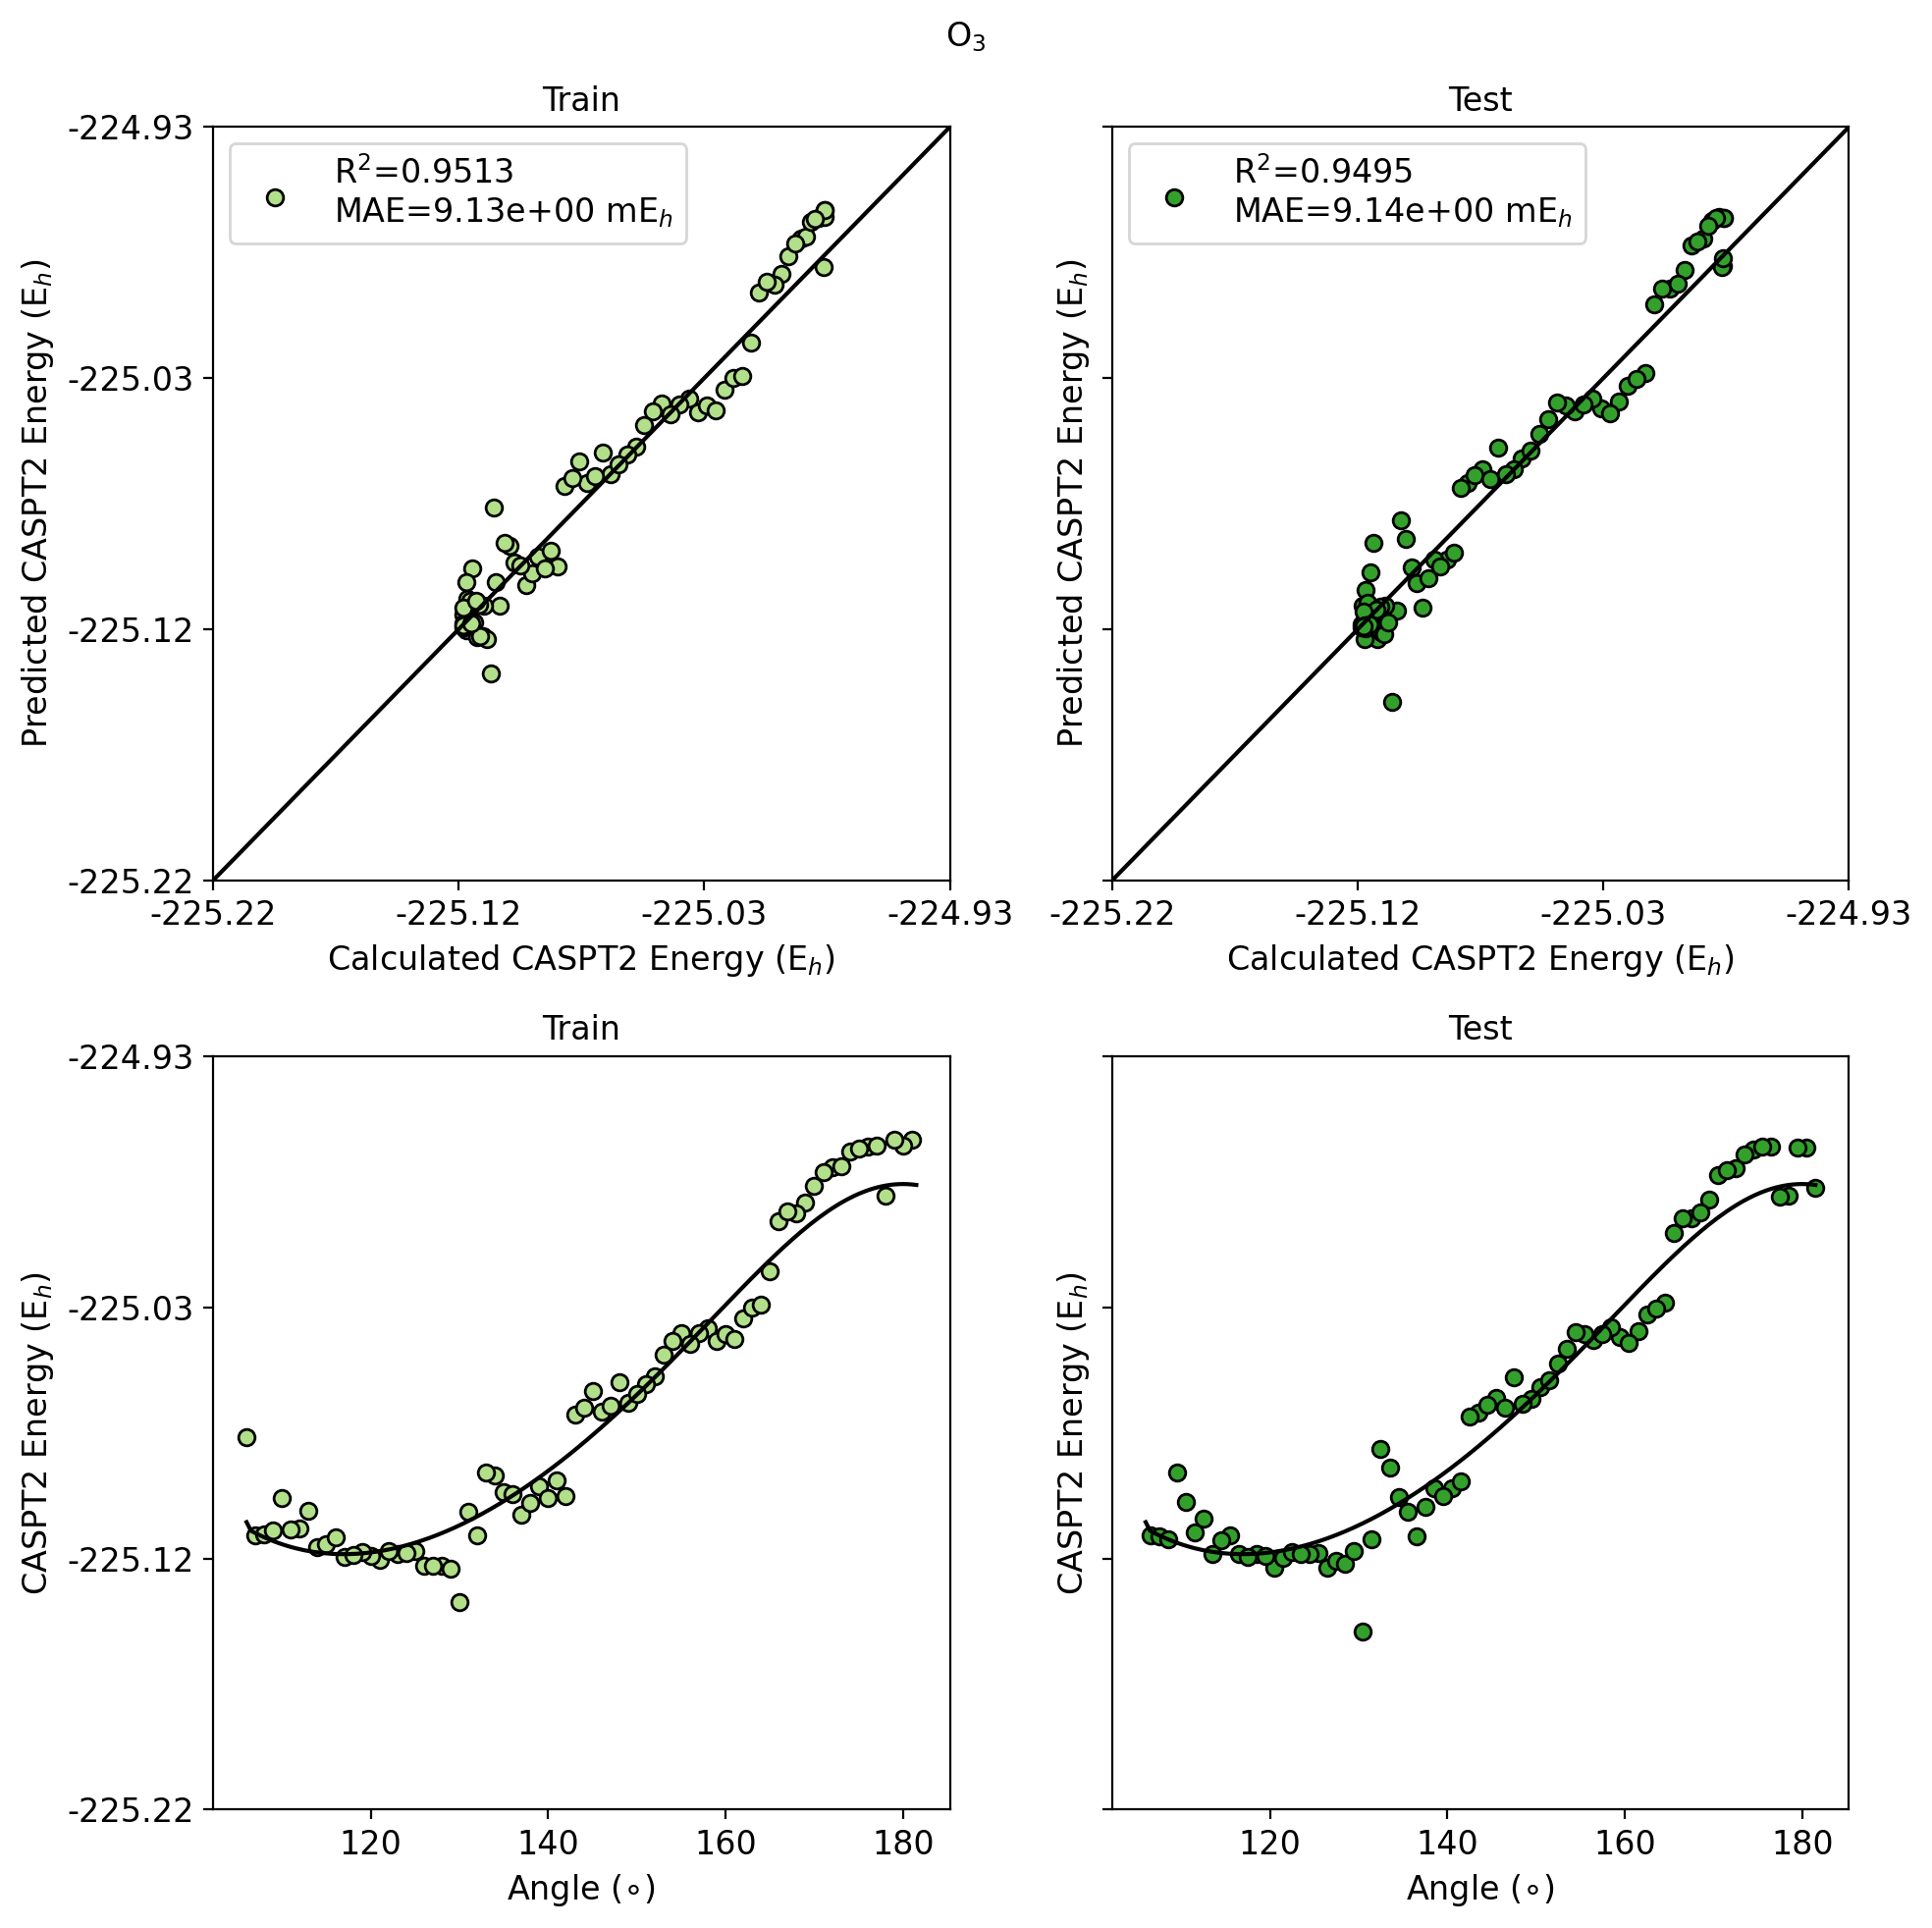

In [28]:
traincorrerr = {}
for n in sorted(set(traincaspt2melt['system'])):
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10),sharey=True)
    
    pred_train,true_train = traincorrE2[traincorrE2['system']==n]['E$_{\text{CASPT2}}^{\text{Predicted}}$'],traincorrE2[traincorrE2['system']==n]['E$_{\text{CASPT2}}^{\text{Calculated}}$']
    pred_test,true_test = testcorrE2[testcorrE2['system']==n]['E$_{\text{CASPT2}}^{\text{Predicted}}$'],testcorrE2[testcorrE2['system']==n]['E$_{\text{CASPT2}}^{\text{Calculated}}$']
    testrad = testcorrE2[testcorrE2['system']==n]['Radius ($\AA$)']    
    train_r2_corr = r2_score(true_train,pred_train)
    test_r2_corr = r2_score(true_test,pred_test)
    test_mae_corr = 1e3*mean_absolute_error(true_test,pred_test)
    train_mae_corr = 1e3*mean_absolute_error(true_train,pred_train)
    
    traincorrerr[n] = {"r2_train":train_r2_corr,"r2_test":test_r2_corr,"mae_train":train_mae_corr,"mae_test":test_mae_corr}
    trainrad = traincorrE2[traincorrE2['system']==n]['Radius ($\AA$)']

    
    ax1.scatter(true_train,pred_train,label='R$^{2}$='+f'{train_r2_corr:.4f}\nMAE={train_mae_corr:.2e}'+" mE$_{h}$",color=pairedcp[2],edgecolors='k')
    ax1.plot(np.arange(-10000,10000),np.arange(-10000,10000),'k')
    ax1.set_xlabel('Calculated CASPT2 Energy (E$_{h}$)')
    ax1.set_ylabel('Predicted CASPT2 Energy (E$_{h}$)')
    ax1.set_title('Train')
    ax1.legend()


    ax2.scatter(true_test,pred_test,label='R$^{2}$='+f'{test_r2_corr:.4f}\nMAE={test_mae_corr:.2e}'+" mE$_{h}$",color=pairedcp[3],edgecolors='k')
    ax2.plot(np.arange(-10000,10000),np.arange(-10000,10000),'k')
    ax2.set_xlabel('Calculated CASPT2 Energy (E$_{h}$)')
    ax2.set_ylabel('Predicted CASPT2 Energy (E$_{h}$)')
    ax2.set_title('Test')    
    ax2.legend()
    
    ax3.scatter(np.array(trainrad,dtype=float),pred_train,color=pairedcp[2],edgecolors='k')
    ax3.plot(trueE2[trueE2['system']==n].sort_values(by='Radius ($\AA$)')['Radius ($\AA$)'],trueE2[trueE2['system']==n].sort_values(by='Radius ($\AA$)')['E$_{\text{CASPT2}}^{\text{Calculated}}$'],'k')
    if 'H' in n or 'FeO' in n:
        ax3.set_xlabel('Radius (Å)')
    else:
        ax3.set_xlabel('Angle ($\circ$)')
    ax3.set_ylabel('CASPT2 Energy (E$_{h}$)')
    ax3.set_title('Train')
    
    ax4.scatter(np.array(testrad,dtype=float),pred_test,color=pairedcp[3],edgecolors='k')
    ax4.plot(trueE2[trueE2['system']==n].sort_values(by='Radius ($\AA$)')['Radius ($\AA$)'],trueE2[trueE2['system']==n].sort_values(by='Radius ($\AA$)')['E$_{\text{CASPT2}}^{\text{Calculated}}$'],'k')
    if 'H' in n or 'FeO' in n:
        ax4.set_xlabel('Radius (Å)')
    else:
        ax4.set_xlabel('Angle ($\circ$)')
    ax4.set_ylabel('CASPT2 Energy (E$_{h}$)')
    ax4.set_title('Test') 

    
    minpt2, maxpt2= pd.concat([true_train,true_test]).min(), pd.concat([true_train,true_test]).max()
    pct=0.01
    bufferbot, buffertop = minpt2*pct, maxpt2*pct

    if 'H' in n:
        bottom, top = bufferbot+minpt2, maxpt2-buffertop
    else:
        bottom, top = minpt2+-0.1, maxpt2+0.05
    print(bottom,top)
    ax1.set_xlim(bottom,top)
    ax1.set_xticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])
    ax1.set_ylim(bottom,top)
    ax1.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    
    ax2.set_xlim(bottom,top)
    ax2.set_xticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    
    ax2.set_ylim(bottom,top)
    ax2.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    


    ax3.set_ylim(bottom,top)
    ax3.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)]) 
    print(n)
    if n=='FeO':
        fig.suptitle(f"{n}")
    else:
        fig.suptitle(f"{n.split('$')[0]}"+"$_{"+re.findall(r'\d+',n)[0]+"}$")
    
    plt.subplots_adjust(wspace=0.05)
    plt.tight_layout()
    plt.savefig(f'images/ltneg4_{n}_CASPT2.png',dpi=300,bbox_inches='tight')
    plt.show()    

FeO


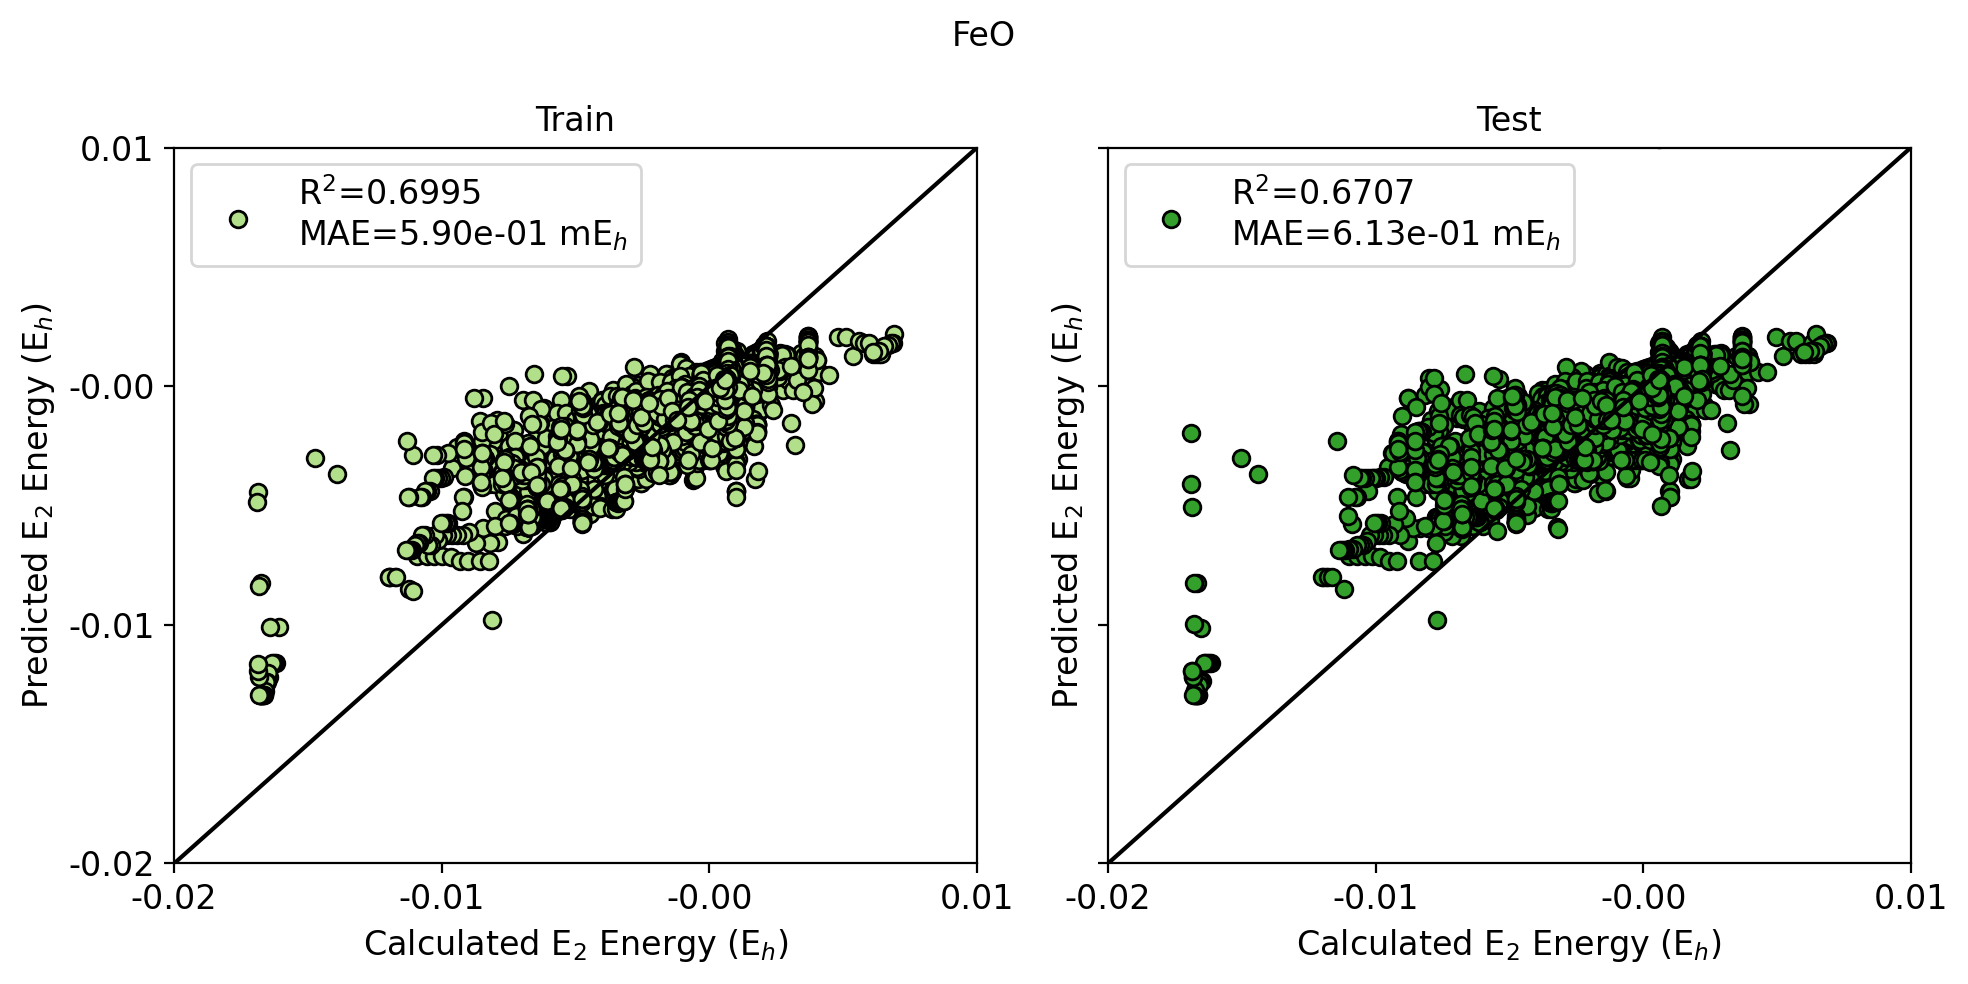

H$_{10}$


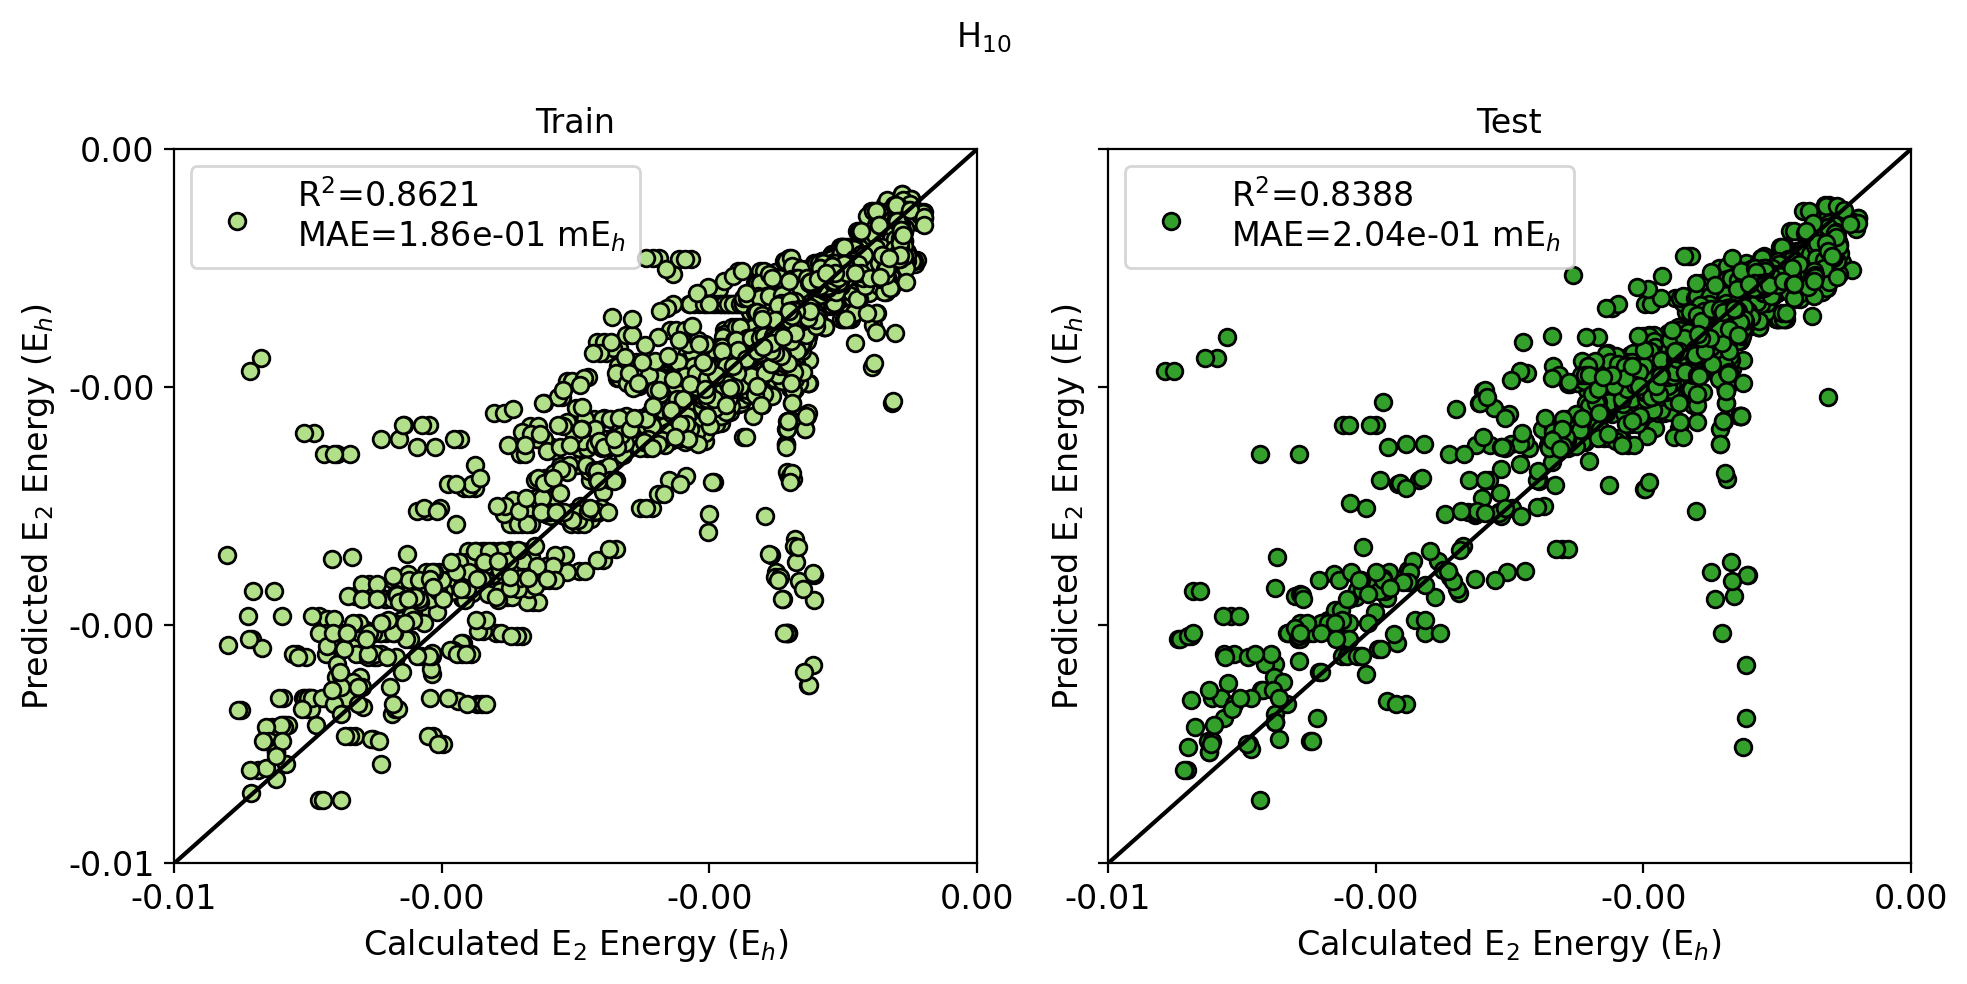

H$_{12}$


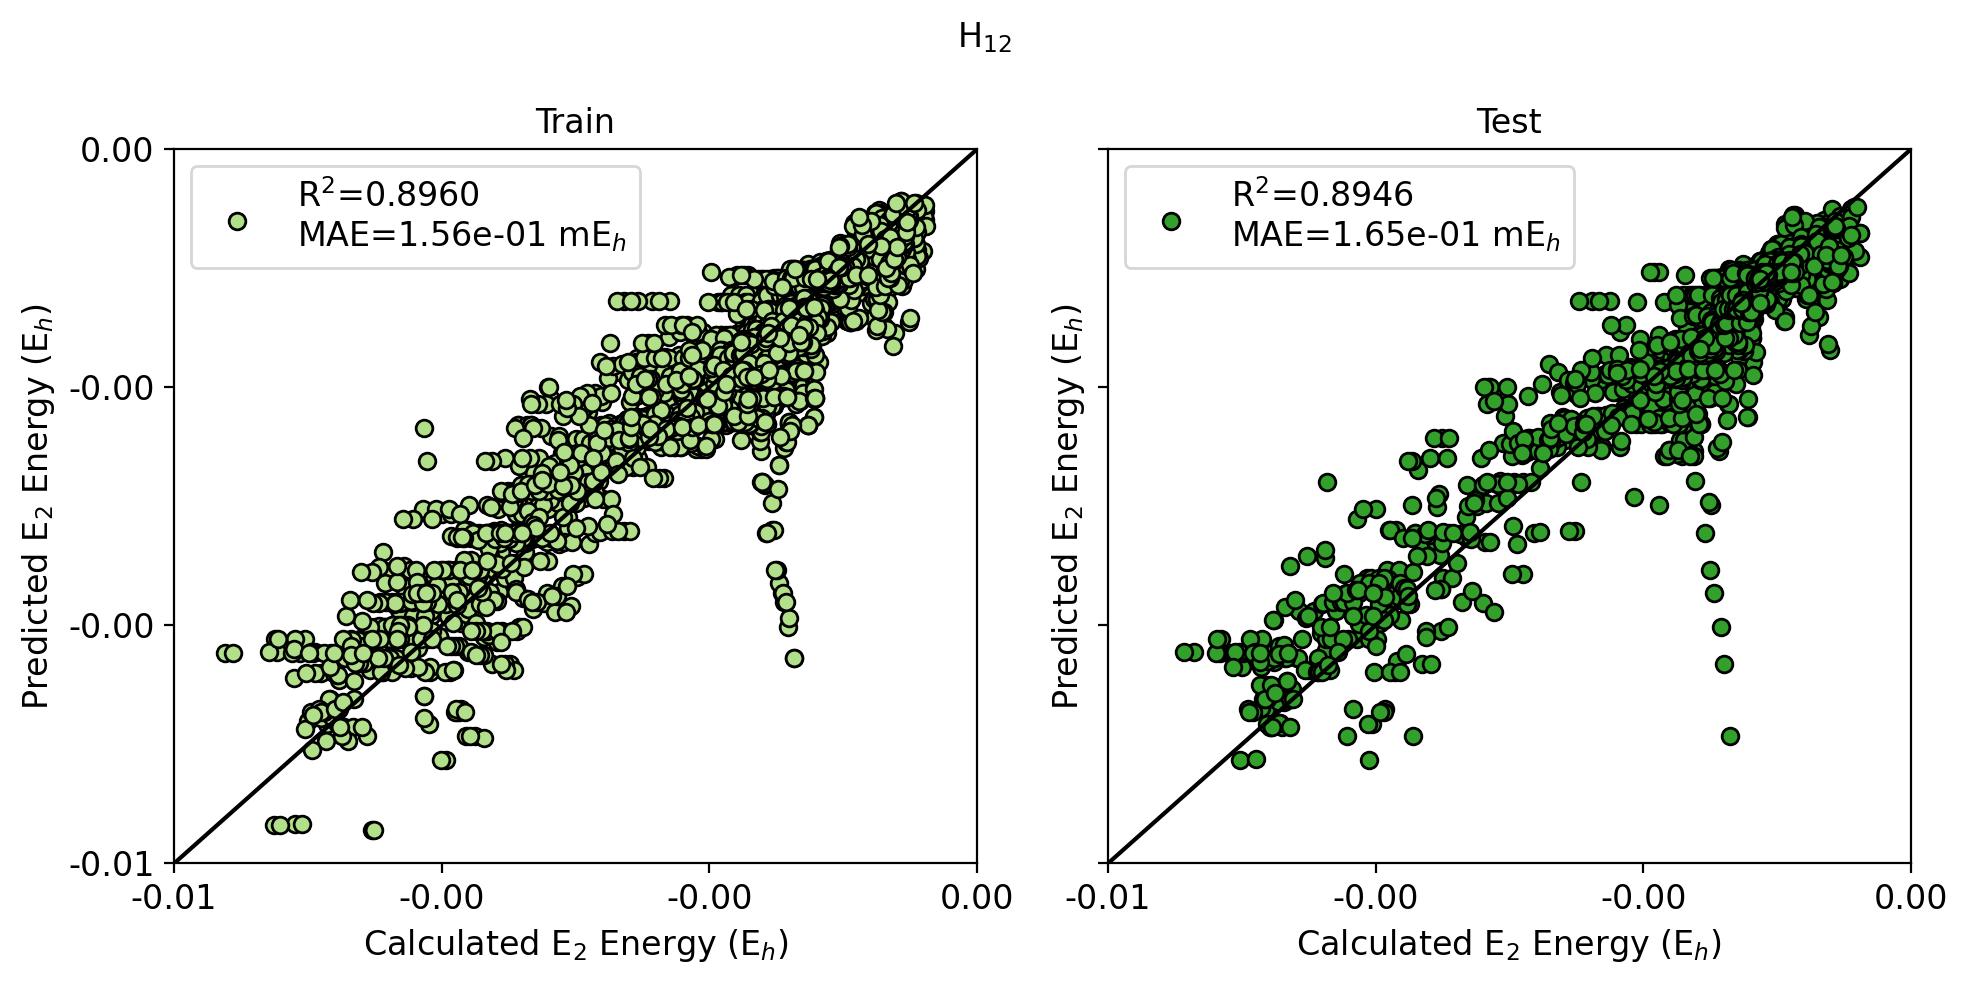

H$_{2}$


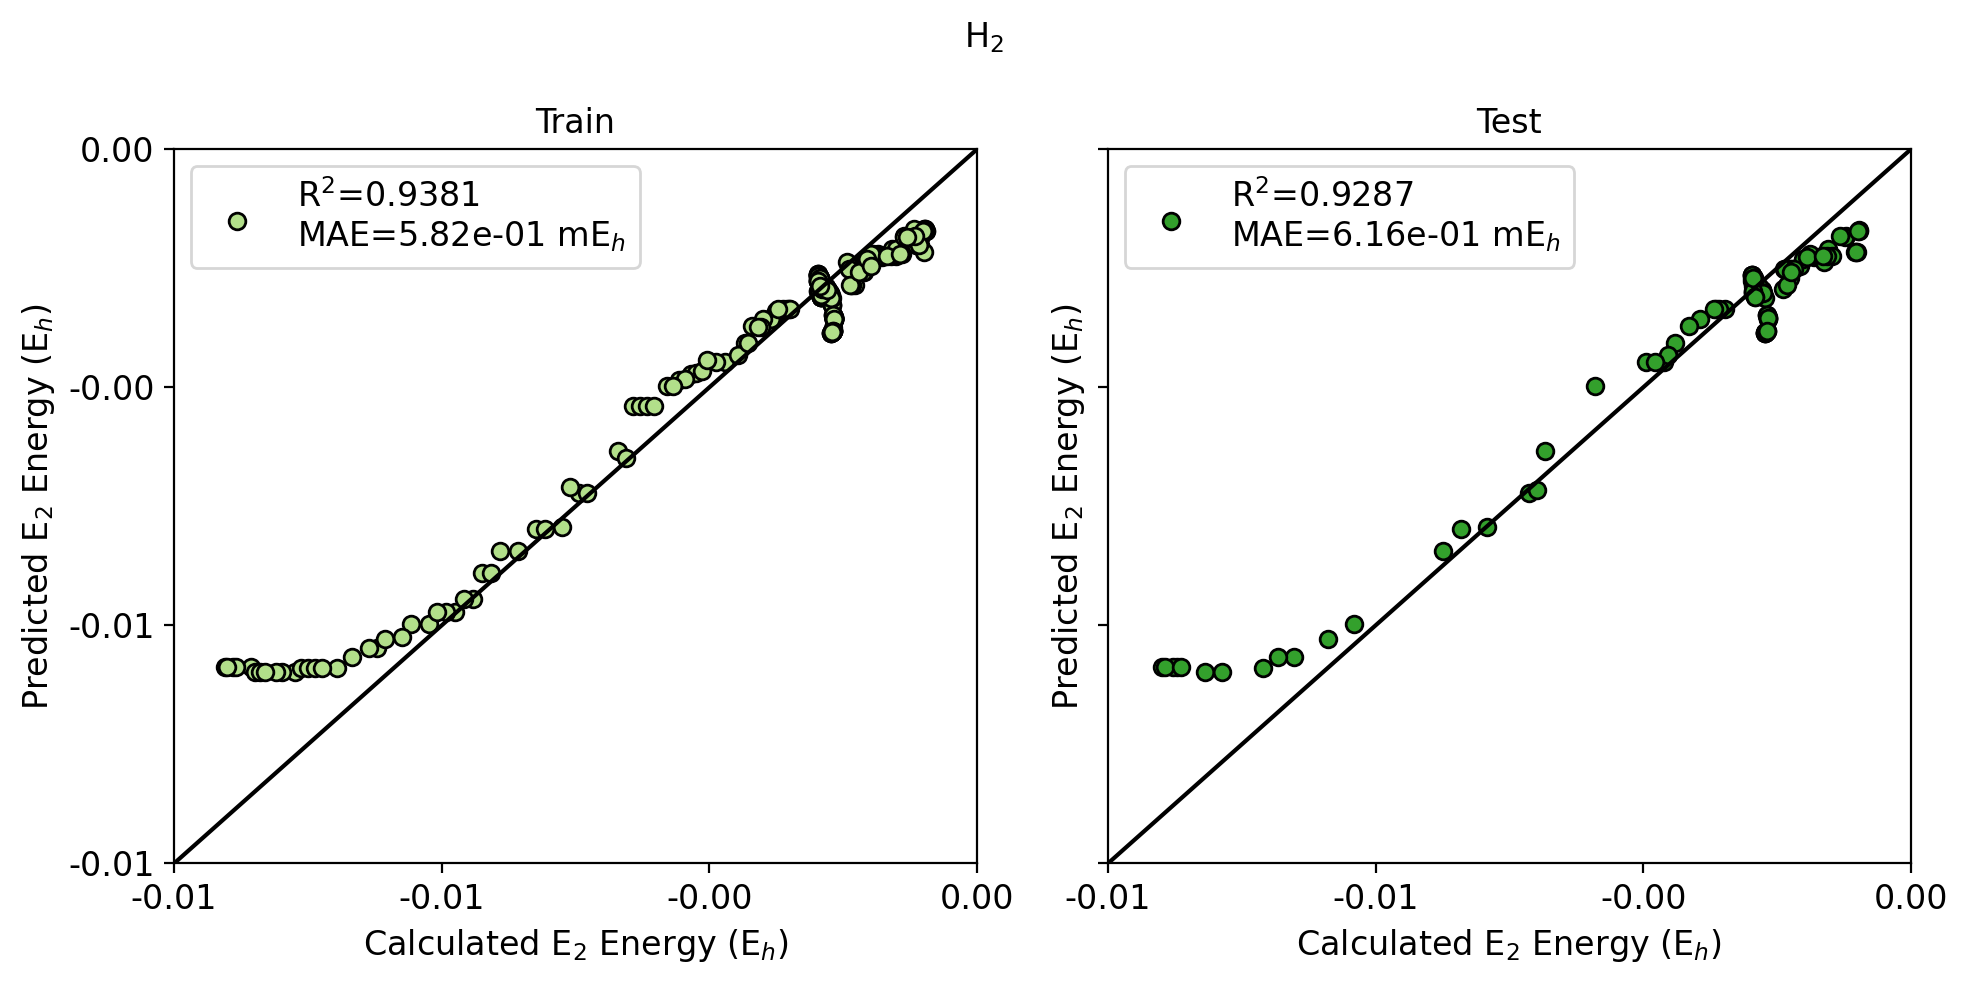

H$_{4}$


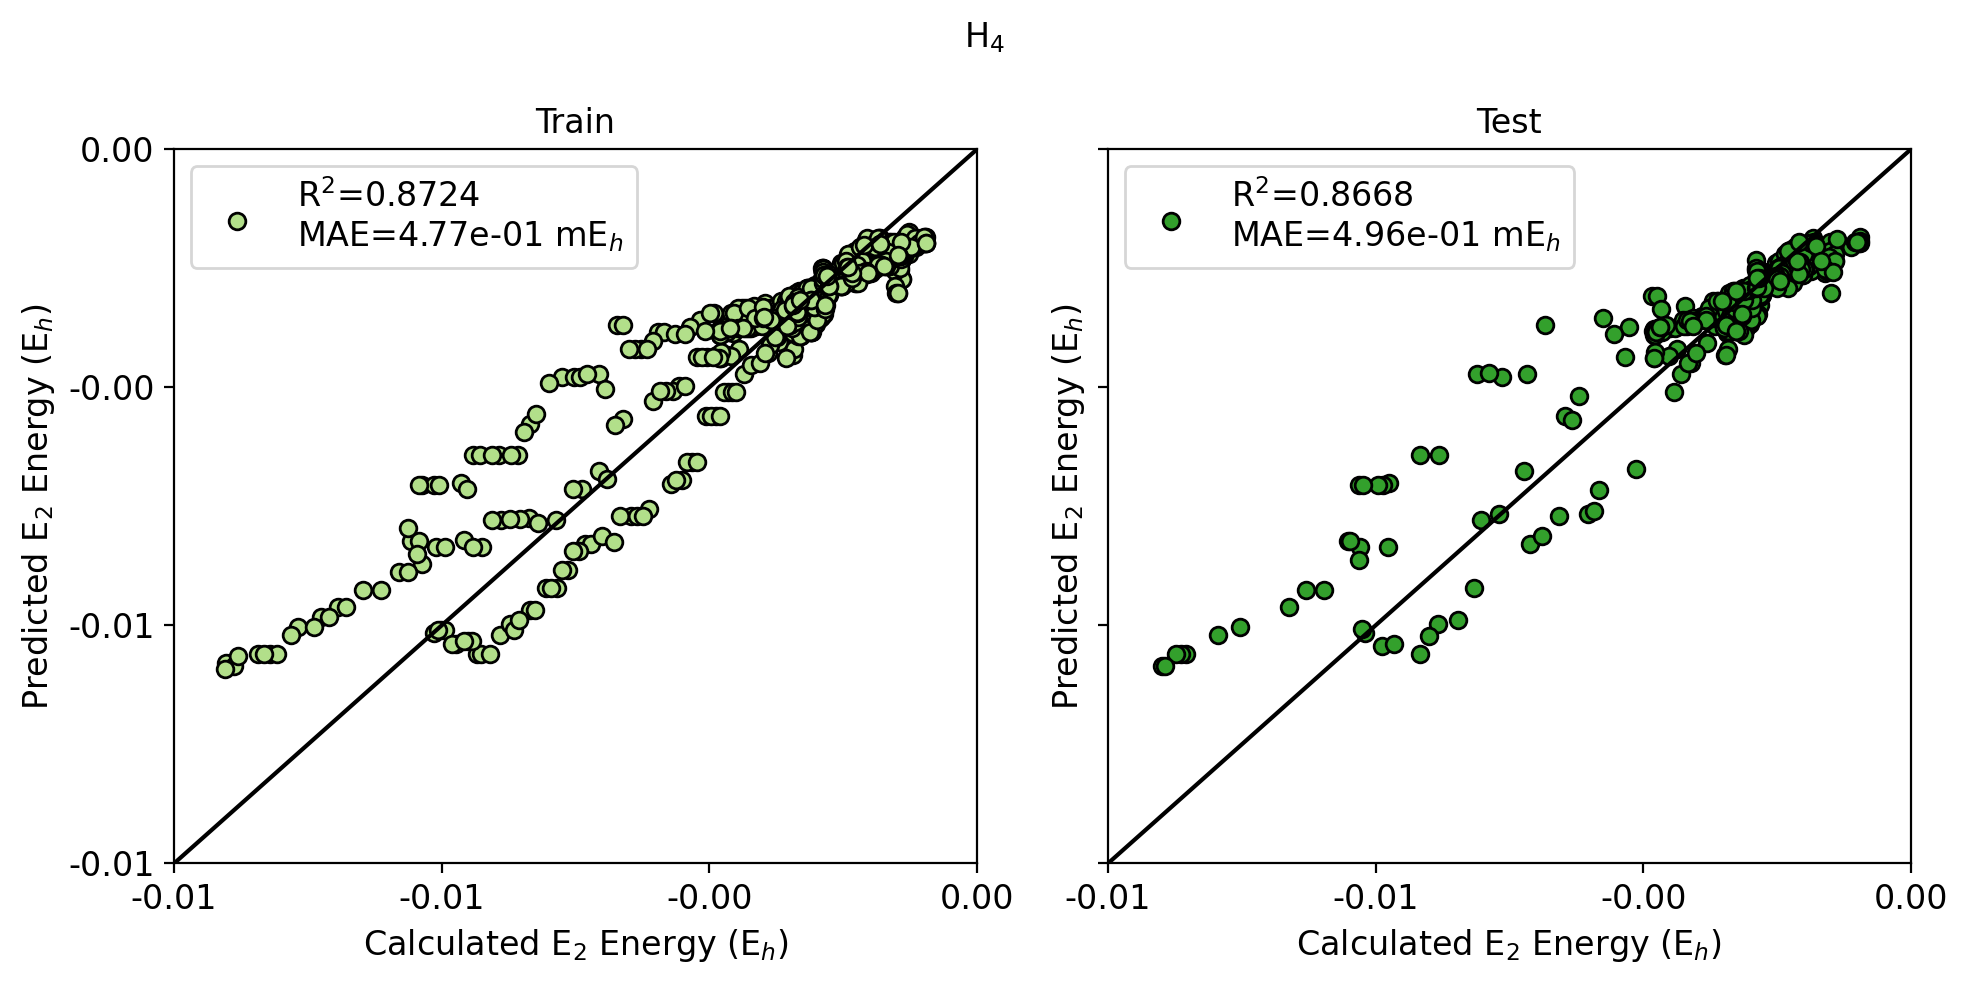

H$_{6}$


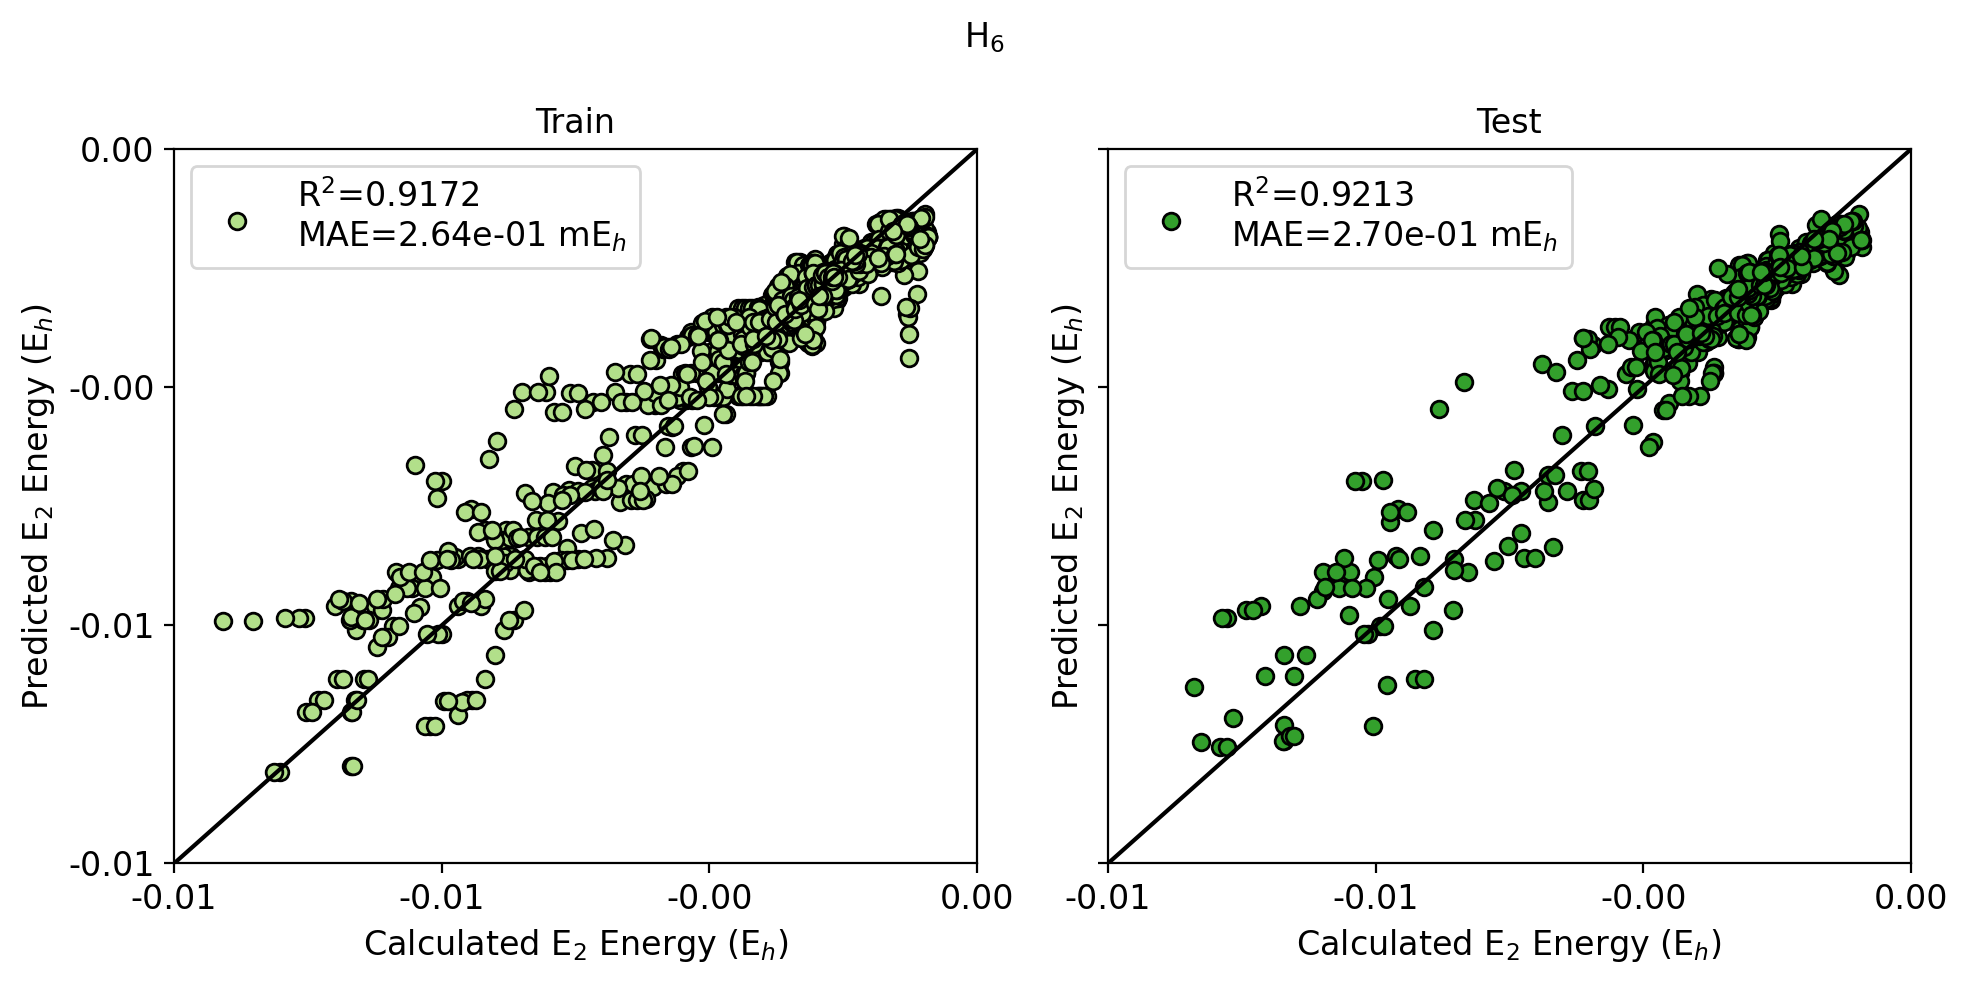

H$_{8}$


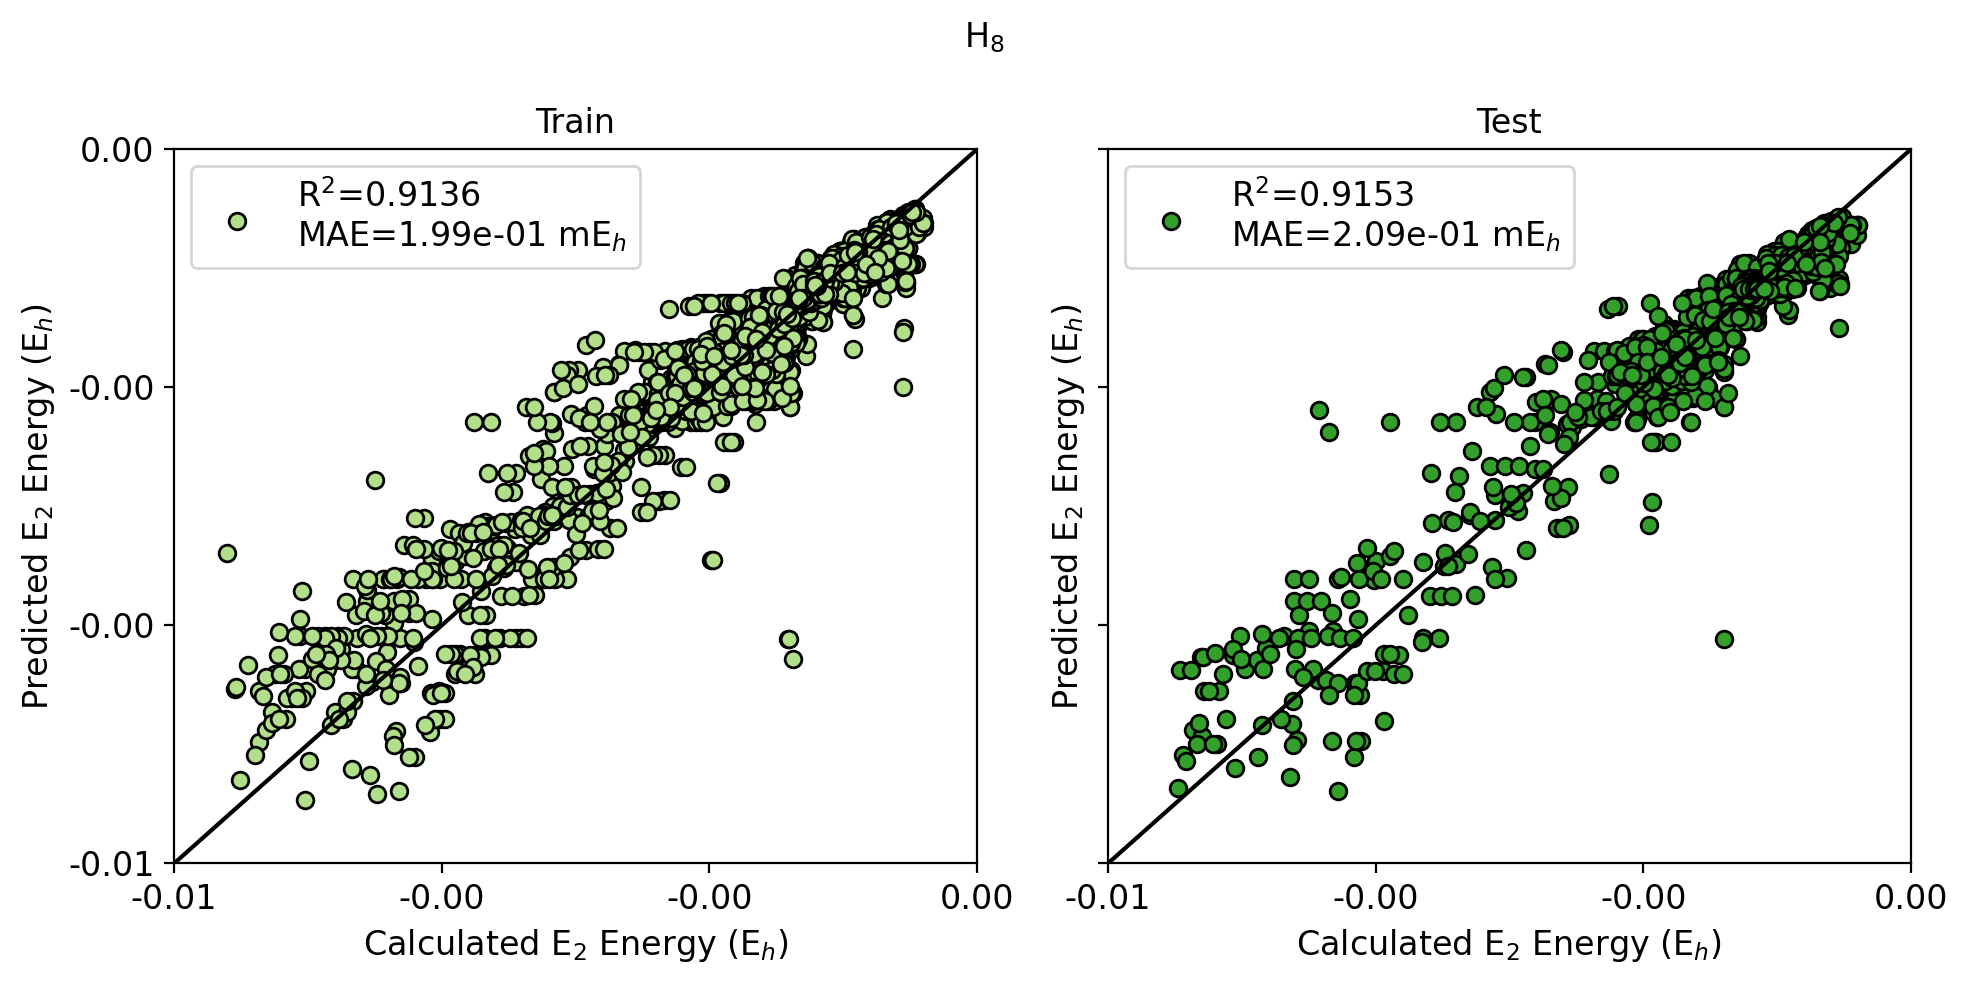

O$_{3}$


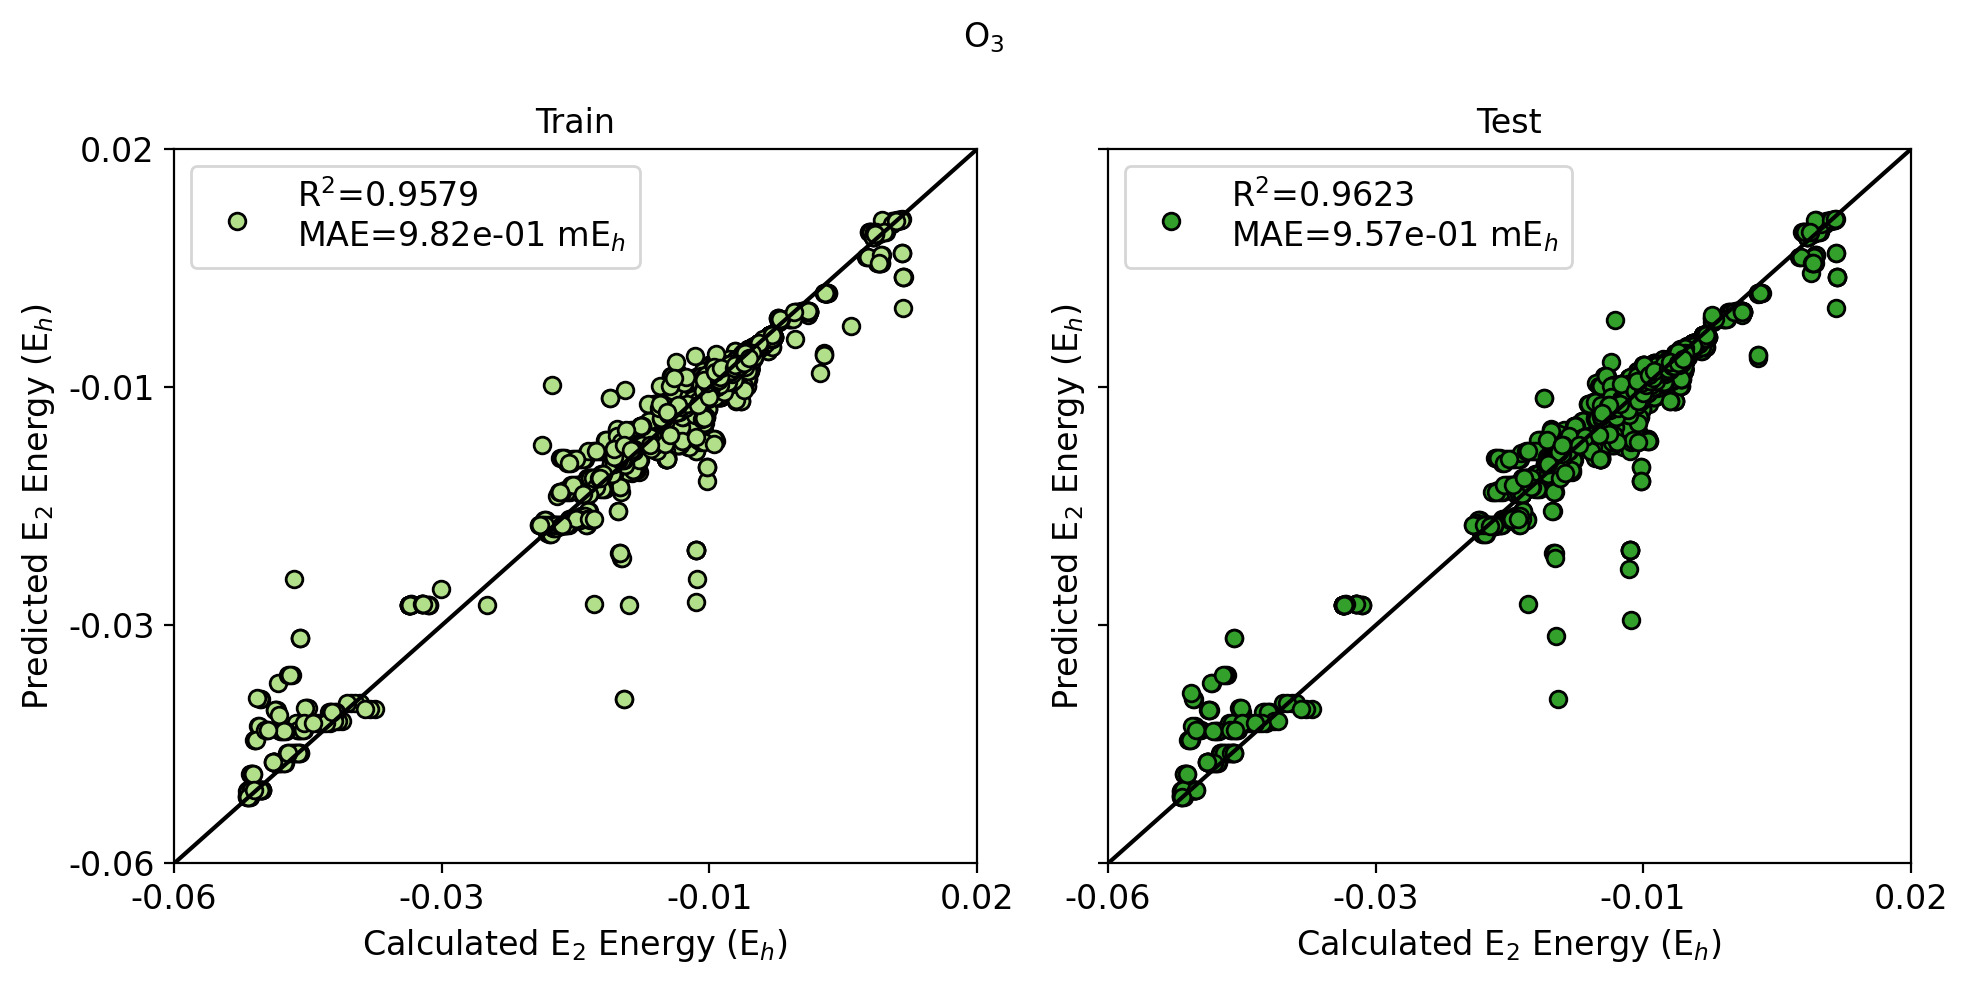

In [29]:
trainpairdf = pd.DataFrame(recover_train_list)
testpairdf = pd.DataFrame(recover_test_list)
pairerr={}
for n in sorted(set(traincaspt2melt['system'])):
    print(n)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5),sharey=True)
    
    truetrainpair, predtrainpair = np.hstack(trainpairdf[trainpairdf[0]==n][2]),np.hstack(trainpairdf[trainpairdf[0]==n][3])
    train_r2_pair = r2_score(truetrainpair, predtrainpair)
    train_mae_pair = 1e3*mean_absolute_error(truetrainpair, predtrainpair)
    ax1.scatter(truetrainpair, predtrainpair,label='R$^{2}$='+f'{train_r2_pair:.4f}\nMAE={train_mae_pair:.2e}'+" mE$_{h}$",color=pairedcp[2],edgecolors='k')
    ax1.plot(np.arange(-10000,10000),np.arange(-10000,10000),'k')
    ax1.set_xlabel('Calculated E$_2$ Energy (E$_{h}$)')
    ax1.set_ylabel('Predicted E$_2$ Energy (E$_{h}$)')
    ax1.set_title('Train')    
    ax1.legend()  
    
    truetestpair, predtestpair = np.hstack(testpairdf[testpairdf[0]==n][2]),np.hstack(testpairdf[testpairdf[0]==n][3])
    test_r2_pair = r2_score(truetestpair, predtestpair)
    test_mae_pair = 1e3*mean_absolute_error(truetestpair, predtestpair)
    ax2.scatter(truetestpair, predtestpair,label='R$^{2}$='+f'{test_r2_pair:.4f}\nMAE={test_mae_pair:.2e}'+" mE$_{h}$",color=pairedcp[3],edgecolors='k')
    ax2.plot(np.arange(-10000,10000),np.arange(-10000,10000),'k')
    ax2.set_xlabel('Calculated E$_2$ Energy (E$_{h}$)')
    ax2.set_ylabel('Predicted E$_2$ Energy (E$_{h}$)')
    ax2.set_title('Test')    
    ax2.legend()    

    mincorr, maxcorr= np.hstack([truetrainpair,truetestpair]).min(), np.hstack([truetrainpair,truetestpair]).max()
    pct=0.50
    bufferbot, buffertop = mincorr*pct, maxcorr*pct

    # if 'H' in n:
    bottom, top = mincorr-buffertop, maxcorr+buffertop
    
    # else:
    #     bottom, top = mincorr+-0.1, maxcorr+0.05

    ax1.set_xlim(bottom,top)
    ax1.set_xticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])
    ax1.set_ylim(bottom,top)
    ax1.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    
    ax2.set_xlim(bottom,top)
    ax2.set_xticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    
    ax2.set_ylim(bottom,top)
    ax2.set_yticks(np.linspace(bottom,top,4),[f"{i:.2f}" for i in np.linspace(bottom,top,4)])    

    if n=='FeO':
        fig.suptitle(f"{n}")
    else:
        fig.suptitle(f"{n.split('$')[0]}"+"$_{"+re.findall(r'\d+',n)[0]+"}$")
    
    plt.tight_layout()
    plt.savefig(f'images/ltneg4_{n}_E2.png',dpi=300,bbox_inches='tight')    
    plt.show()
    pairerr[n] = {"r2_train":train_r2_pair,"r2_test":test_r2_pair,"mae_train":train_mae_pair,"mae_test":test_mae_pair}

In [30]:
sort_order = [
    'H$_{2}$',
    'H$_{4}$',
    'H$_{6}$',
    'H$_{8}$',
    'H$_{10}$',
    'H$_{12}$',
    'O$_{3}$',
    'FeO'
]

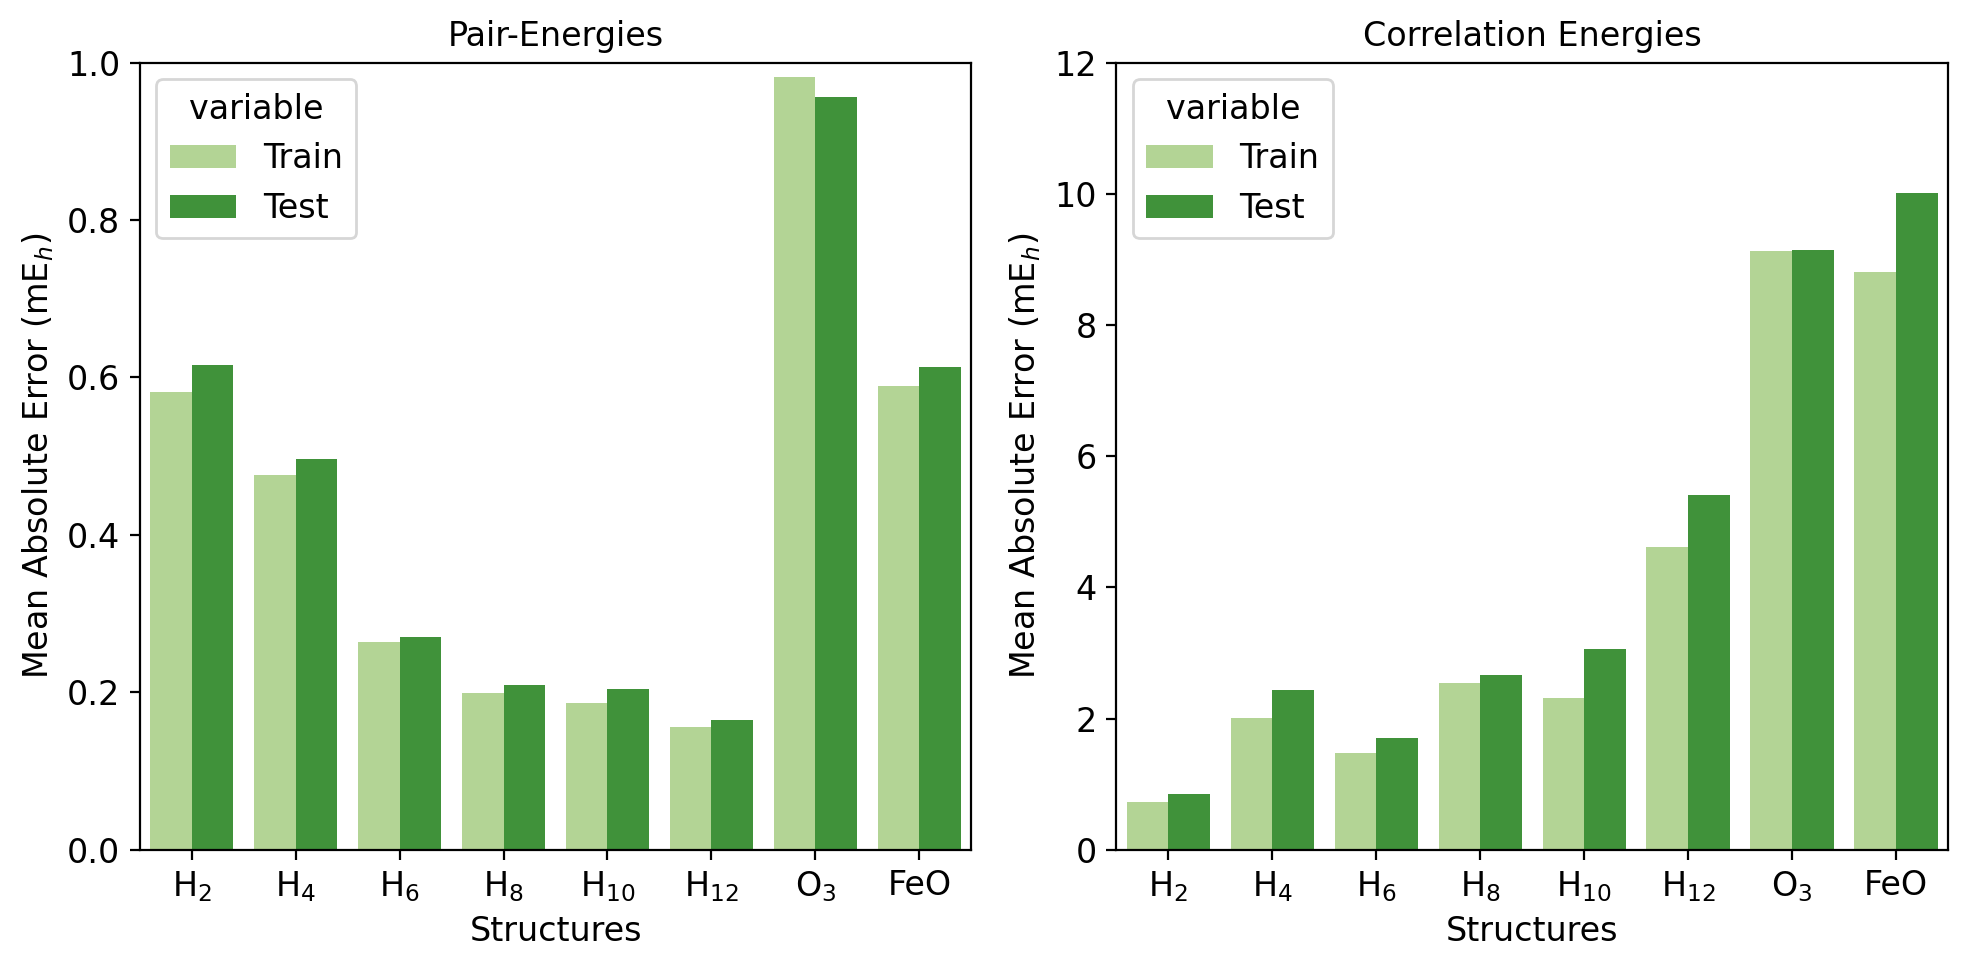

In [31]:
meltcorrerr = pd.DataFrame.from_dict(traincorrerr).loc[['mae_train','mae_test']].T.rename(columns={'mae_train':'Train','mae_test':'Test'}).reset_index().melt(id_vars=['index'], value_vars=['Train','Test']).set_index('index').loc[sort_order]
# meltcorrerr['numeric_value'] = meltcorrerr['index'].str.extract(r'\$_\{(\d+)\}\$').astype(int)
# meltcorrerr['numeric_value'] = meltcorrerr['index'].str.extract(r'\$_\{(\d+)\}\$')
# meltcorrerr = meltcorrerr.sort_values(by='numeric_value').reset_index(drop=True)

meltpairerr = pd.DataFrame.from_dict(pairerr).loc[['mae_train','mae_test']].T.rename(columns={'mae_train':'Train','mae_test':'Test'}).reset_index().melt(id_vars=['index'], value_vars=['Train','Test']).set_index('index').loc[sort_order]
# meltpairerr['numeric_value'] = meltpairerr['index'].str.extract(r'\$_\{(\d+)\}\$').astype(int)
# meltpairerr = meltpairerr.sort_values(by='numeric_value').reset_index(drop=True)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sns.barplot(data=meltpairerr,x='index',y='value',hue='variable',palette=pairedcp[2:4],ax=ax1)
ax1.set_ylabel('Mean Absolute Error (mE$_{h}$)')
ax1.set_xlabel('Structures')
ax1.set_title('Pair-Energies')
ax1.set_ylim(0,1)
sns.barplot(data=meltcorrerr,x='index',y='value',hue='variable',palette=pairedcp[2:4],ax=ax2)
# ax2.set_ylabel('Mean Absolute Error (mE$_{h}$)')
ax2.set_ylabel('')
ax2.set_xlabel('Structures')
ax2.set_title('Correlation Energies')
ax2.set_ylabel('Mean Absolute Error (mE$_{h}$)')
ax2.set_ylim(0,12)
plt.tight_layout()
plt.savefig('images/ltneg4_MAE_bar.png',dpi=300,bbox_inches='tight')
plt.show()

In [32]:
statdf = pd.concat([meltcorrerr.rename(columns={'value':'Correlation Energy'}),meltpairerr.rename(columns={'value':'Pair-Energies','variable':'drop'})],axis=1).drop(columns='drop')
statdf.to_excel('ltneg4stats.xlsx')

In [33]:
statdf

variable  Correlation Energy  Pair-Energies
index                                               
H$_{2}$     Train            0.723480       0.582120
H$_{2}$      Test            0.855661       0.615602
H$_{4}$     Train            2.007230       0.476602
H$_{4}$      Test            2.432894       0.496343
H$_{6}$     Train            1.476941       0.264460
H$_{6}$      Test            1.701768       0.269761
H$_{8}$     Train            2.546732       0.198837
H$_{8}$      Test            2.661718       0.208962
H$_{10}$    Train            2.319142       0.186297
H$_{10}$     Test            3.053566       0.203915
H$_{12}$    Train            4.618259       0.156122
H$_{12}$     Test            5.408130       0.164682
O$_{3}$     Train            9.133639       0.981579
O$_{3}$      Test            9.142605       0.956960
FeO         Train            8.813092       0.589687
FeO          Test           10.014669       0.613126